In [2]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=c2547825558c8b23b74f87e2e98a29208132a5522ed7f87242d79f1e5e198f3e
  Stored in directory: c:\users\hyeok\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#한글과 음수 표시
matplotlib.rc('font',family='NanumGothic')
matplotlib.rc("axes",unicode_minus = False)

from scipy.stats import shapiro
from scipy import stats
import scipy
from statsmodels.stats.proportion import proportions_ztest

import statsmodels.formula.api as smf
from statsmodels.api import qqplot
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor
#graphviz
import os
# os.environ["PATH"] += os.pathsep + '/home/piai/anaconda3/lib/python3.9/site-packages/sphinx/templates/graphviz'
import graphviz

# 그래프크기조절
import pydotplus

import warnings 
warnings.filterwarnings('ignore')

#스케일 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀 분석
import statsmodels.api as sm

from scipy.stats import f_oneway
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [99]:
matplotlib.rc("font",family = "Malgun Gothic")
matplotlib.rc("axes",unicode_minus = False) # 음수표시 

In [498]:
df = pd.read_csv("2. Big Data 분석/Car.csv", encoding='euc-kr')
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


데이터 속성, 행과 열 형태 확인<br>
결측치 확인

In [499]:
print(df.shape)
df.info()
df.isnull().sum()

(7253, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

### 결측치 확인 결과
Price, Engine, Power, Seats, New_Price에 결측치 확인 <br>
-> Price의 결측치는 제외 (목표변수)<br>
-> Mileage는 가격에 영향을 많이 미친다고 생각하여 결측치 제외<br>
-> Engine, Power, Seats 평균치로 대체

Mileage , Engine , Power의 단위부분이 같이 들어있는 항목 처리

In [500]:
df['Mileage'] = df['Mileage'].str.replace('kmpl','')
df['Engine'] = df['Engine'].str.replace('CC','')
df['Power'] = df['Power'].str.replace('bhp','')
df['Power'] = df['Power'].str.replace('null','0')


df['Mileage'] = df['Mileage'].astype('float64')
df['Engine'] = df['Engine'].astype('float64')
df['Power'] = df['Power'].astype('float64')

df['Brand'] = df['Name'].apply(lambda x: x.split()[0])

In [501]:
df.drop("Name", axis = 1, inplace=True)
df.head()

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,Honda
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Audi


In [502]:
print(df.shape)
df.info()
df.isnull().sum()

(7253, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Price              6200 non-null   float64
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7207 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Brand              7253 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Brand                   0
dtype: int64

### Price의 결측값 제거

In [503]:
df = df.dropna(subset = ['Price','Mileage'], axis=0)
df.shape

(6198, 13)

### Engine, Power, Seats, Mileage의 결측치를 평균으로 대체

In [504]:
df.Engine = df.Engine.fillna(df.Engine.mean())
df.Power = df.Power.fillna(df.Power.mean())
df.Seats = df.Seats.fillna(df.Seats.mean())

In [505]:
df.isnull().sum()

Location                0
Price                   0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5194
Brand                   0
dtype: int64

In [506]:
df_dt1 = df.drop(df[["New_Price"]],axis=1)

In [507]:
df_dt1.isnull().sum()

Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Brand                0
dtype: int64

In [508]:
df_dt1.columns

Index(['Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Brand'],
      dtype='object')

### 연속형 변수에 대한 상자수염 그래프를 그려 이상치 확인

<AxesSubplot:>

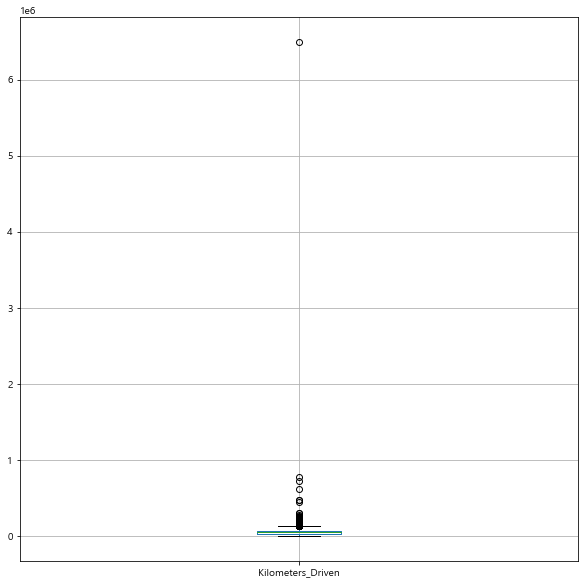

In [111]:
plt.figure(figsize=(10,10))
df.boxplot(column = ['Kilometers_Driven'])

이상치로 확인된 Killometers_Driven 값 확인

In [112]:
#650km는 나올 수 없는 주행거리라 판단하여 이상치로 판단 후, 제거
#평균 자동차 주행거리는 2~30만km로 판단, 40만km이상은 이상치로 판단 후 제거
display(df[df['Kilometers_Driven']>400000])
df = df[df.Kilometers_Driven < 400000]

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
340,Kolkata,11497.20,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,Skoda
358,Chennai,4138.99,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,Hyundai
1860,Chennai,9044.46,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,Volkswagen
2328,Chennai,99642.40,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,BMW
2823,Chennai,19928.48,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,Volkswagen
3092,Kolkata,7664.80,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,Honda
4491,Bangalore,6821.67,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,Hyundai


<AxesSubplot:>

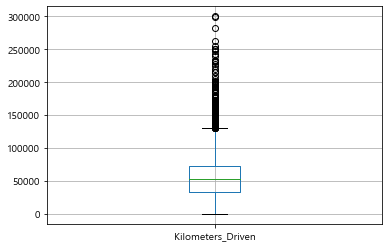

In [113]:
#이상치 제거 후, boxplot 재확인
df.boxplot(column=['Kilometers_Driven'])

<AxesSubplot:>

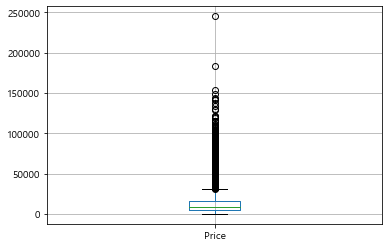

In [114]:
df.boxplot(column = ['Price'])

In [115]:
display(df[df['Price']>170000])

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
4079,Hyderabad,245273.6,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,2.3 Cr,Land
5781,Delhi,183955.2,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,NaN,Lamborghini


레인지로버의 경우, 신차 가격이 약 2억 500만원으로 중고가격이 2억 4천만원은 이상치로 판단으로 제거<br>
람보르기니의 경우, 신차 가격이 3-4억으로 중고가격 1억 8천만원은 이상치로 판단 안함.

<AxesSubplot:>

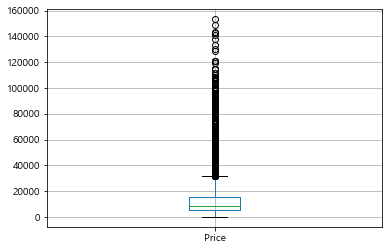

In [116]:
df = df[df.Price < 170000]
df.boxplot(column = ['Price'])

<AxesSubplot:>

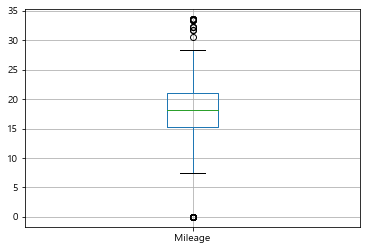

In [117]:
df.boxplot(column = ['Mileage'])

Mileage가 0은 차가 작동하지 않는 상태라 판단하여, 이상치 제거<br>
또한, 자동차 평균 연비를 고려하여 30 이상인 Mileage 이상치 제거

<AxesSubplot:>

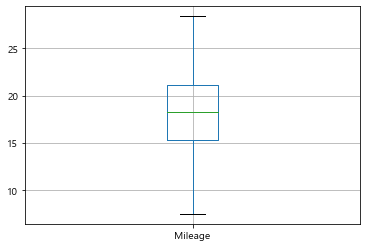

In [118]:
df = df[(df.Mileage > 0) & (df.Mileage <30)]
df.boxplot(column = ['Mileage'])

<AxesSubplot:>

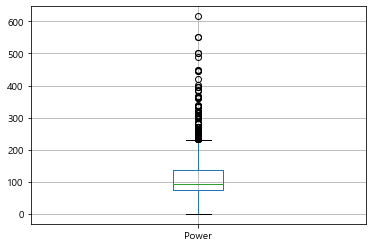

In [119]:
df.boxplot(column = ['Power'])

<AxesSubplot:>

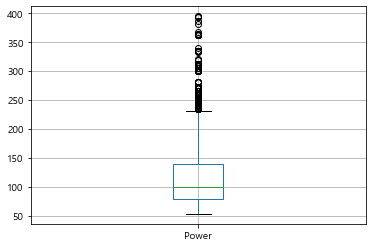

In [120]:
df = df[(df.Power < 400) & (df.Power >50) ]
df.boxplot(column = ['Power'])

평균 마력은 골고루 분포되어 있기 때문에, 이상치라 판단하지 않아 제거하지 않았음

<AxesSubplot:>

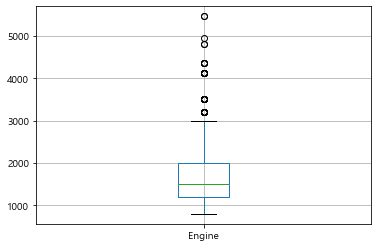

In [121]:
df.boxplot(column = ['Engine'])

엔진의 최대 출력량은 골고루 분포되어 있기 때문에, 이상치라 판단하지 않아 제거하지 않았음.

<AxesSubplot:>

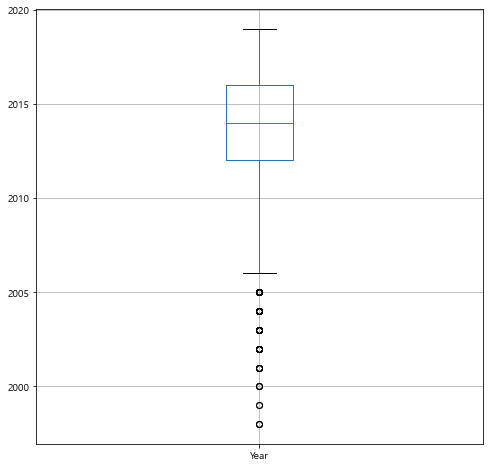

In [122]:
plt.figure(figsize=(8,8))
df.boxplot(column = ['Year'])

<AxesSubplot:>

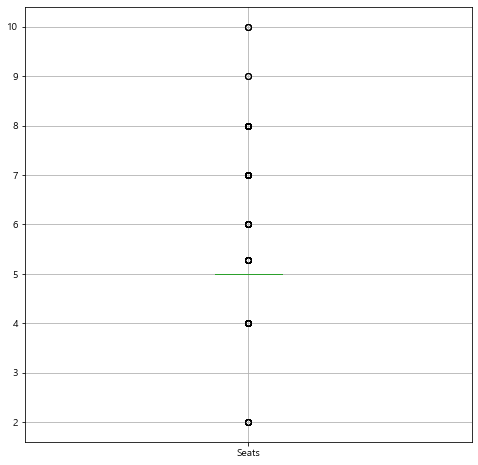

In [123]:
plt.figure(figsize=(8,8))
df.boxplot(column = ['Seats'])

<AxesSubplot:>

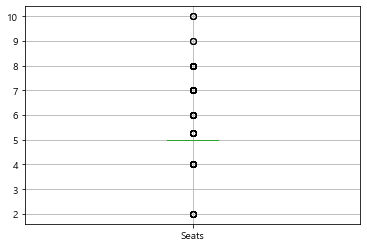

In [124]:
df[(df['Seats']>0)]
df.boxplot(column=['Seats'])

In [125]:
df[(df['Year']<2000)]

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
1224,Jaipur,1180.38,1999,70000,Petrol,Manual,Second,17.3,993.0,60.0,5.0,NaN,Maruti
1845,Pune,1379.66,1999,140000,Petrol,Manual,First,13.0,1343.0,90.0,5.0,NaN,Honda
3138,Jaipur,689.83,1998,95150,Petrol,Manual,Third,17.3,993.0,60.0,5.0,NaN,Maruti
3749,Mumbai,5978.54,1998,55300,Diesel,Automatic,First,10.0,1796.0,157.7,5.0,NaN,Mercedes-Benz
5716,Jaipur,812.47,1998,95150,Petrol,Manual,Third,17.3,993.0,60.0,5.0,NaN,Maruti


자동차의 연식이 1998년은 있을 수 있다고 판단하여, 이상치라 생각하지 않았음

단위 수 조절을 위해, 생산 년도 대신 연식으로 바꿈

In [126]:
df['Year'] = 2023 - df['Year']

요약통계량 확인

In [127]:
df.describe()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,5858.000000,5858.000000,5858.000000,5858.000000,5858.000000,5858.000000,5858.000000
mean,15148.380504,9.424548,56555.395869,18.308892,1638.546543,114.342995,5.300485
std,17143.105642,3.141997,33600.099623,4.105312,569.717575,50.354586,0.798891
min,7.080000,4.000000,600.000000,7.500000,799.000000,52.800000,2.000000
25%,5748.600000,7.000000,33000.000000,15.290000,1198.000000,78.900000,5.000000
50%,9044.460000,9.000000,52158.500000,18.200000,1497.000000,98.600000,5.000000
75%,16460.157500,11.000000,72019.000000,21.100000,1991.000000,140.000000,5.000000
max,148804.430000,25.000000,300000.000000,28.400000,5461.000000,395.000000,10.000000


In [128]:
df[df["Price"]<100]

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
7236,Kochi,7.08,5,23955,Petrol,Manual,First,18.6,1197.0,81.86,5.0,7.08 Lakh,Hyundai


In [129]:
df= df[df["Price"]>100]

In [130]:
df.describe()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,5857.000000,5857.000000,5857.000000,5857.000000,5857.000000,5857.000000,5857.000000
mean,15150.965667,9.425303,56560.961926,18.308842,1638.621931,114.348541,5.300537
std,17143.427324,3.141733,33600.267336,4.105661,569.736995,50.357096,0.798949
min,689.830000,4.000000,600.000000,7.500000,799.000000,52.800000,2.000000
25%,5748.600000,7.000000,33000.000000,15.290000,1198.000000,78.900000,5.000000
50%,9044.460000,9.000000,52191.000000,18.200000,1497.000000,98.600000,5.000000
75%,16479.320000,11.000000,72022.000000,21.100000,1991.000000,140.000000,5.000000
max,148804.430000,25.000000,300000.000000,28.400000,5461.000000,395.000000,10.000000


## 그래프 분석 및 통계적 가설 검정
범주형 설명변수 항목과 목표변수 간의 분포 확인: Boxplot, Heatmap 등
    
연속형 설명변수 항목과 목표변수 간의 분포 확인: Scatter plot, Scatter Matrix 등

### 범주형 설명변수 항목과 목표변수 간의 Boxplot

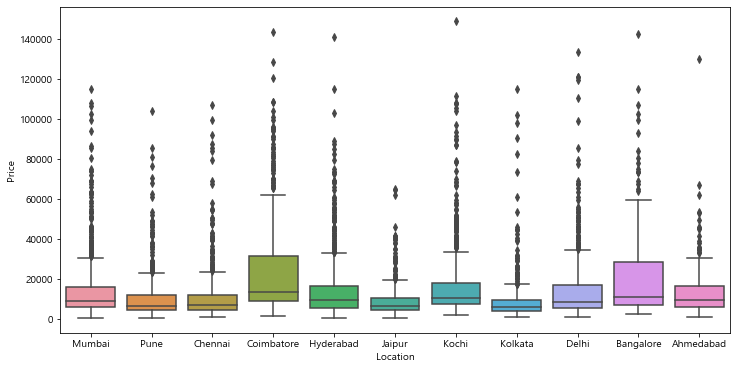

In [131]:
#Location과 Price의 분포 
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = 'Location', y = 'Price')
plt.show()

boxplot을 보면 차를 팔거나 구매하는 위치에서 뚜렷한 관계성이 보이지 않는다고 생각한다.

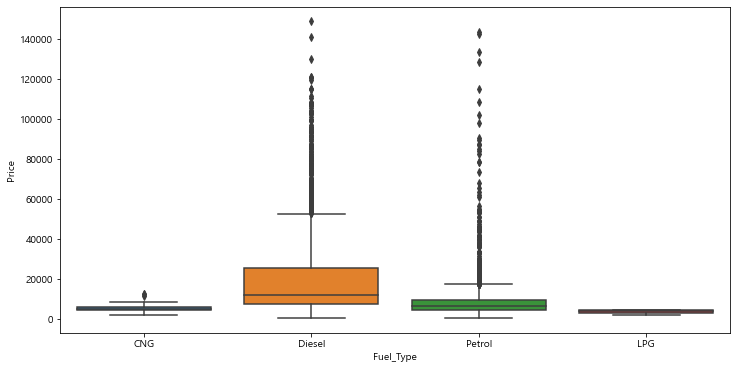

In [132]:
#Fuel_Type과 Price의 분포 

plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = 'Fuel_Type', y = 'Price')
plt.show()

사용연료에 따른 가격 차이를 보면, Dieselm Petrol이 높은 가격에 형성되어 있는 것을 볼 수 있다.

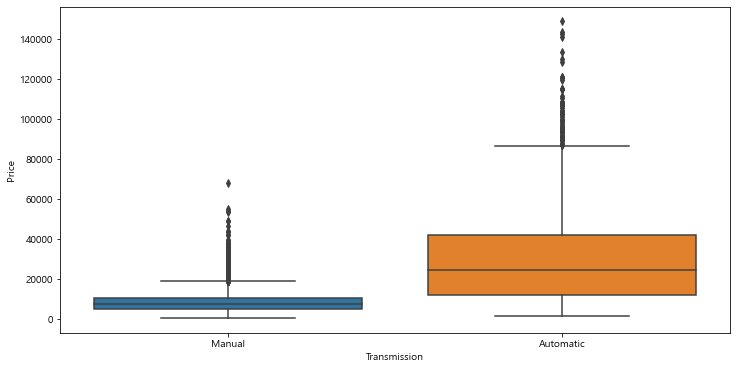

In [133]:
#Transmission과 Price의 분포 

plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = 'Transmission', y = 'Price')
plt.show()

변속기의 종류에 따른 가격을 보면 수동보다 자동일 경우 높은 가격이 형성되어 있다.

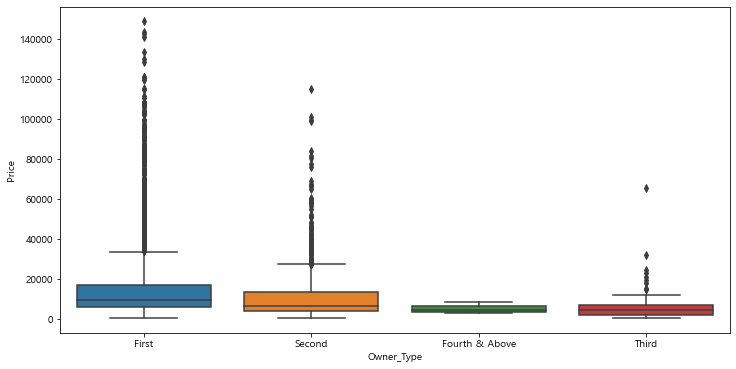

In [134]:
#Owner_Type과 Price의 분포 

plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = 'Owner_Type', y = 'Price')
plt.show()

직접 소유일 경우에 높은 가격이 형성되어 있고, 그 외인 경우에 가격이 더 낮다<br>
boxplot으로만 판단하기 어려워, 검정을 수행하여 판단하기로 함

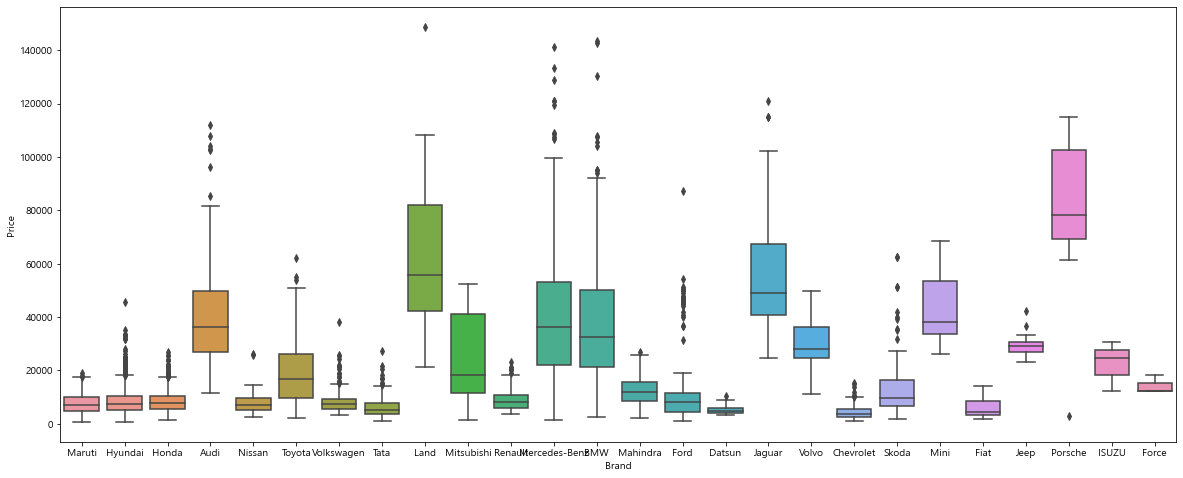

In [135]:
#Brand과 Price의 분포 

plt.figure(figsize=(20, 8))
sns.boxplot(data = df, x = 'Brand', y = 'Price')
plt.show()

그래프를 보면 많은 관계가 있다고 할 순 없지만, 자동차의 브랜드마다 가격차이가 나는 경우가 많기 때문에 관계성이 있다고 판단하였다.

- 실행결과 p값이 0으로, 유의수준 5%에서 제조사별로 소유권 종류의 차이가 있다고 말할 수 있다.
- 그러므로, 제조사와 소유권 사이의 영향력이 있다.

### 연속형 설명변수 항목과 목표변수 간의 Scatter plot

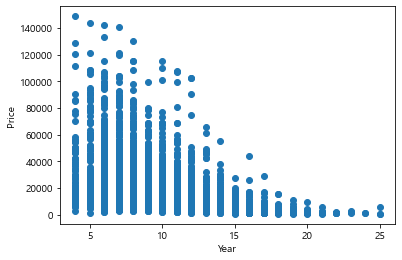

In [136]:
plt.scatter(df['Year'],df['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

연식이 오래되지 않을수록 가격이 높다는 것을 확인할 수 있음

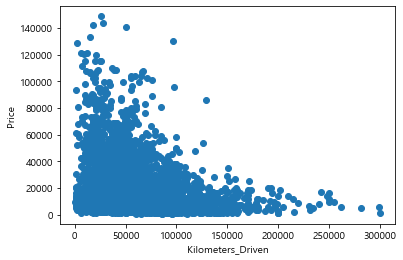

In [137]:
plt.scatter(df['Kilometers_Driven'],df['Price'])
plt.xlabel('Kilometers_Driven')
plt.ylabel('Price')
plt.show()

적은 km 수를 탈수록 가격이 높은 것을 확인할 수 있음

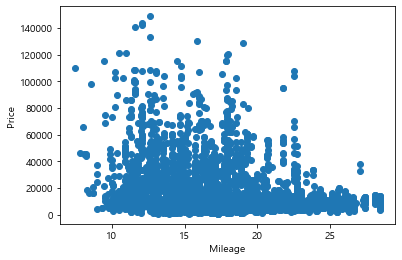

In [138]:
plt.scatter(df['Mileage'],df['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

연비에 따른 가격과의 관계는 뚜렷하지 않으므로 관계가 미미하다고 판단함.

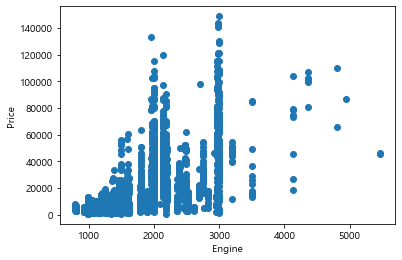

In [139]:
plt.scatter(df['Engine'],df['Price'])
plt.xlabel('Engine')
plt.ylabel('Price')
plt.show()

배기량이 3000cc까지는 커질수록 가격이 높아지는 경향이 있으나, 그 이후로는 뚜렷한 관계가 보이지 않음.

배기량이 클수록 엔진의 크기와 차체 크기가 큰데, 무조건적으로 큰 차가 높은 가격을 보이지는 않음

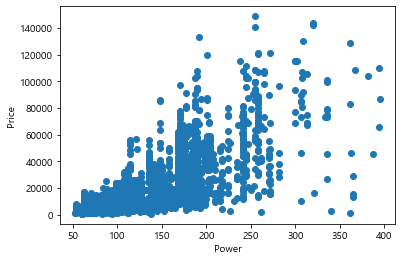

In [140]:
plt.scatter(df['Power'],df['Price'])
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()

최대 출력이 클수록 가격이 높다.

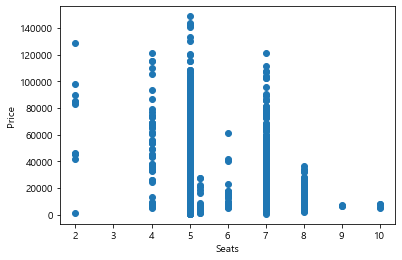

In [141]:
plt.scatter(df['Seats'],df['Price'])
plt.xlabel('Seats')
plt.ylabel('Price')
plt.show()

좌석 수와 가격은 큰 관계성이 있다고 볼 수 없다

### 연속형 설명변수와 목표변수 간의 scatter matrix

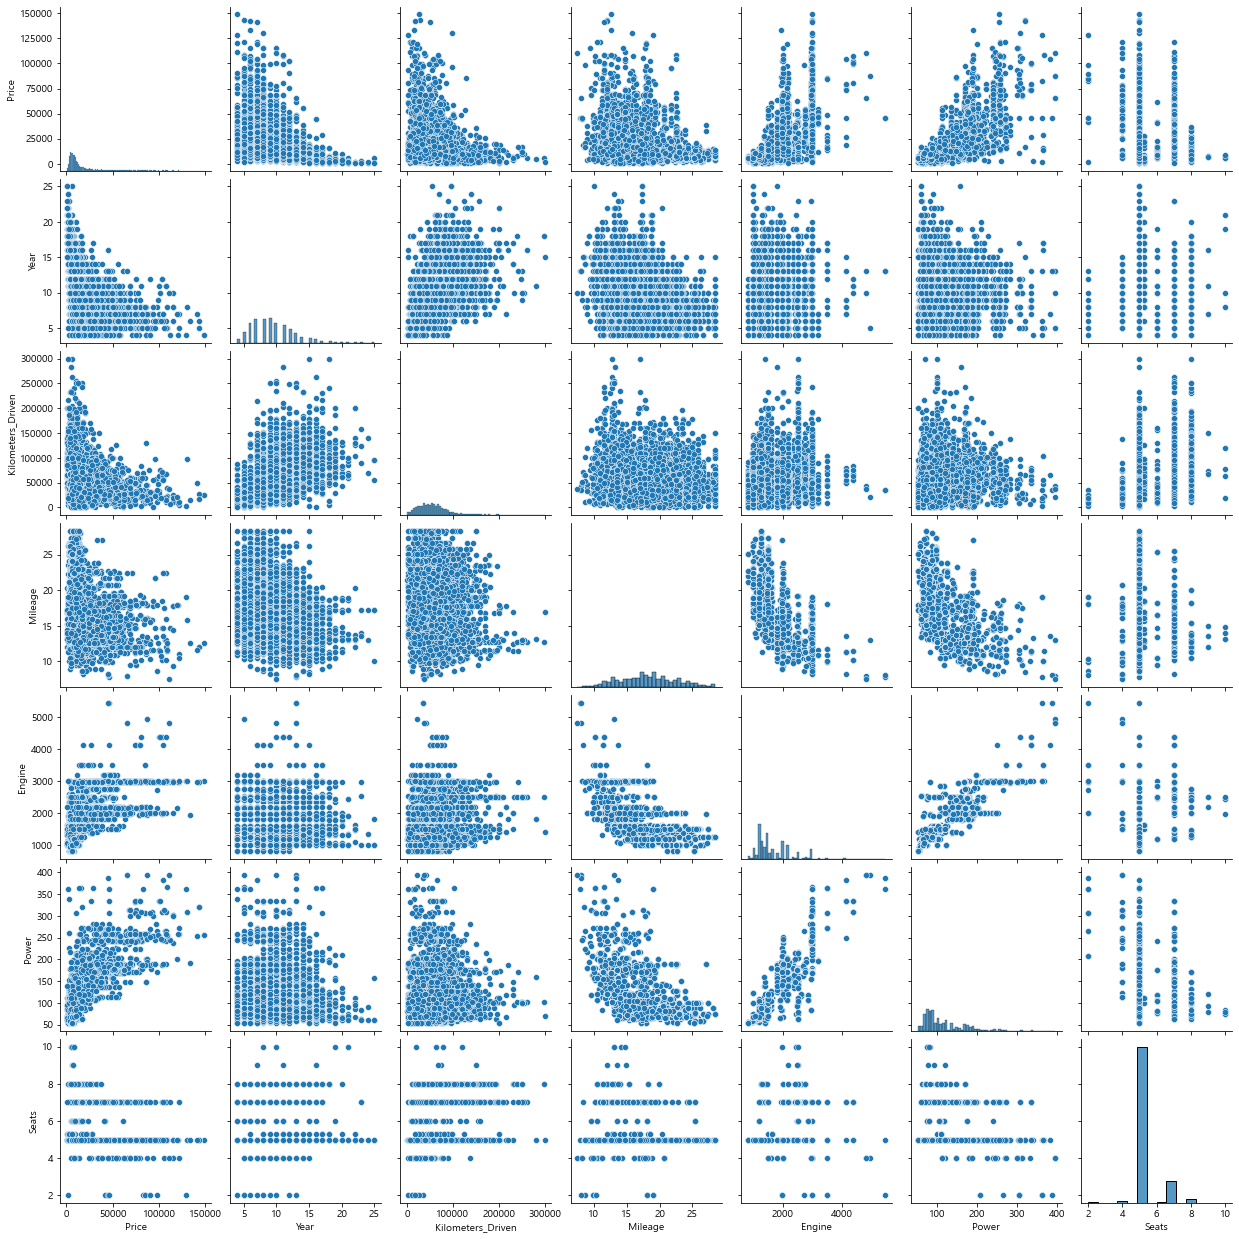

In [142]:
sns.pairplot(df, diag_kind='hist')
plt.show()

## 설명변수 항목과 목표변수 간 차이 검정

## t-test

- 자동차의 사용변속기 종류와 가격 차이를 확인하기 위한 2 sample t-test

In [143]:
df1 = df.loc[df['Transmission']=='Manual']
df2 = df1['Price']
df2 = pd.DataFrame(df2)
df2 = df2.rename(columns={'Price':'Manual'})
df3 = df.loc[df['Transmission']=='Automatic']
df4 = df3['Price']
df4 = pd.DataFrame(df4)
df4= df4.rename(columns={'Price':'Automatic'})

# df2 = df1['Transmission']

In [144]:
# 데이터 컬럼 수를 맞추기 위해 인덱스 슬라이싱 진행
df2 = df2[:1728]

In [145]:
df2.reset_index(drop=True,inplace=True)
df2

,Manual
0,2682.68
1,19162.00
2,6898.32
3,9197.76
4,3602.46
...,...
1723,1226.37
1724,9872.26
1725,4445.58
1726,7051.62


In [146]:
df4.reset_index(drop=True,inplace=True)
df4

,Automatic
0,27194.71
1,26826.80
2,6882.99
3,41389.92
4,42922.88
...,...
1723,95150.83
1724,23209.01
1725,104042.00
1726,19100.68


In [147]:
df5 = pd.concat([df2, df4],axis=1)
df5

,Manual,Automatic
0,2682.68,27194.71
1,19162.00,26826.80
2,6898.32,6882.99
3,9197.76,41389.92
4,3602.46,42922.88
...,...,...
1723,1226.37,95150.83
1724,9872.26,23209.01
1725,4445.58,104042.00
1726,7051.62,19100.68


Shapiro-Wilk Test : statistic=0.8126436471939087, p-value=7.280306041553155e-41
Shapiro-Wilk Test : statistic=0.8679693937301636, p-value=7.066353280893193e-36


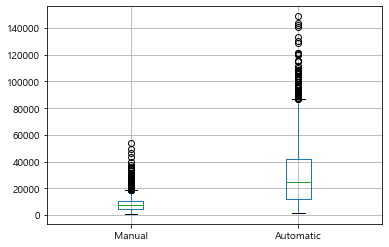

In [148]:
df5.boxplot(["Manual", "Automatic"])

# 'satis' 정규성 검정: Shapiro-Wilk Test , # 정규성이 둘 중 하나라도 안되면 바로 비모수검정을 해야함.
statistic, p = stats.shapiro(df5['Manual'])
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df5['Automatic'])
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

- B 집단의 p값이 0.05보다 작으므로 정규성 검정에서 귀무가설이 기각되어 정규성을 띄지 않는다. 
- 그래도 정규성을 띈다고 가정하고 등분산성 검정을 실시해보았다.

In [149]:
# 등분산성 검정 -> 채택되면 있고, 기각되면 없음 
# (채택되면 stats.ttest_ind메서드의 파라미터인 equal_var를 True ,기각되면 equal_var를 False, default 값은 True임)
print(stats.bartlett(df5['Manual'],df5['Automatic']))

t_result = stats.ttest_ind(df5['Manual'],df5['Automatic'])
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-sample t-test")
print("t: {}".format(t))
print("p: {}".format(p))

BartlettResult(statistic=2811.830724651099, pvalue=0.0)
2-sample t-test
t: -37.261
p: 0.0


- 등분산성 검정 결과, p값이 0.05보다 작으므로 등분산성 검정의 귀무가설을 기각하여 등분산성을 만족하지 않는다.
- 그러므로 t-test를 실시하지 않고 바로 비모수검정을 실시해야한다. 그러나 등분산성을 만족한다고 가정하여 2-sample t-test를 진행해보았다. 결국엔 등분산성을 만족해야하므로 다른 검정방식을 실시하였다.

## ANOVA

In [150]:
#제조사별 중고차 가격 차이 검정
group_data = []
for group in df['Brand'].unique():
    group_data.append(df.loc[df['Brand']==group, 'Price'])

f_statistic, p_value = f_oneway(*group_data)  
print("F-statistic: {}".format(f_statistic.round(3)))
print("p_value: {}".format(p_value.round()))

F-statistic: 318.901
p_value: 0.0


Anova 분석 결과 유의수준 5%에서 검정 결과 p 값이 0.0이므로 제조사 별 가격차이가 있다고 판단할 수 있다.

In [151]:
#사용연료 별 중고차 가격 차이 검정
group_data = []
for group in df['Fuel_Type'].unique():
    group_data.append(df.loc[df['Fuel_Type']==group, 'Price'])

f_statistic, p_value = f_oneway(*group_data)  
print("F-statistic: {}".format(f_statistic.round(3)))
print("p_value: {}".format(p_value.round()))

F-statistic: 224.849
p_value: 0.0


In [152]:
#위치 별 중고차 가격 차이 검정
group_data = []
for group in df['Location'].unique():
    group_data.append(df.loc[df['Location']==group, 'Price'])

f_statistic, p_value = f_oneway(*group_data)  
print("F-statistic: {}".format(f_statistic.round(3)))
print("p_value: {}".format(p_value.round(10)))

F-statistic: 39.379
p_value: 0.0


In [153]:
#변속기 별 중고차 가격 차이 검정
group_data = []
for group in df['Transmission'].unique():
    group_data.append(df.loc[df['Transmission']==group, 'Price'])

f_statistic, p_value = f_oneway(*group_data)  
print("F-statistic: {}".format(f_statistic.round(3)))
print("p_value: {}".format(p_value.round()))

F-statistic: 3029.296
p_value: 0.0


## 카이제곱

In [154]:
#제조사별과 소유권 종류에 따른 카이제곱 검정
df_b = pd.crosstab(df['Brand'],df['Owner_Type'])

chi, pval, dof, expected = stats.chi2_contingency(df_b)

print("Chisq: {}".format(chi.round(3)))
print("p_value: {}".format(pval.round()))
print("Degree of freedom: {}".format(dof))
print("expected value: {}".format(expected.round()))



Chisq: 117.36
p_value: 0.0
Degree of freedom: 75
expected value: [[196.   0.  37.   4.]
 [222.   0.  42.   4.]
 [ 99.   0.  19.   2.]
 [ 14.   0.   3.   0.]
 [ 24.   0.   5.   0.]
 [  2.   0.   0.   0.]
 [246.   0.  46.   5.]
 [510.   1.  96.  10.]
 [886.   1. 166.  18.]
 [  2.   0.   0.   0.]
 [ 34.   0.   6.   1.]
 [ 16.   0.   3.   0.]
 [ 41.   0.   8.   1.]
 [230.   0.  43.   5.]
 [897.   1. 168.  18.]
 [256.   0.  48.   5.]
 [ 24.   0.   5.   0.]
 [ 28.   0.   5.   1.]
 [ 77.   0.  14.   2.]
 [ 12.   0.   2.   0.]
 [125.   0.  23.   2.]
 [147.   0.  28.   3.]
 [137.   0.  26.   3.]
 [337.   1.  63.   7.]
 [263.   0.  49.   5.]
 [ 17.   0.   3.   0.]]


- 실행결과 p값이 0으로, 유의수준 5%에서 제조사별로 소유권 종류의 차이가 있다고 말할 수 있다.
- 그러므로, 제조사와 소유권 사이의 영향력이 있다.

In [155]:
df.corr()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
Price,1.000000,-0.310861,-0.181511,-0.319094,0.630997,0.767426,0.074696
Year,-0.310861,1.000000,0.513205,-0.301157,0.081257,-0.011414,0.001440
Kilometers_Driven,-0.181511,0.513205,1.000000,-0.160753,0.192450,0.005340,0.244364
Mileage,-0.319094,-0.301157,-0.160753,1.000000,-0.651401,-0.553285,-0.363526
Engine,0.630997,0.081257,0.192450,-0.651401,1.000000,0.851282,0.439982
Power,0.767426,-0.011414,0.005340,-0.553285,0.851282,1.000000,0.119644
Seats,0.074696,0.001440,0.244364,-0.363526,0.439982,0.119644,1.000000


- Power, Engine이 상관 정도가 높다. 
- 하지만, Seats를 제외한 나머지 칼럼들도 상관관계가 낮지만, 도메인 지식을 바탕으로 중요하다고 생각함

<AxesSubplot:>

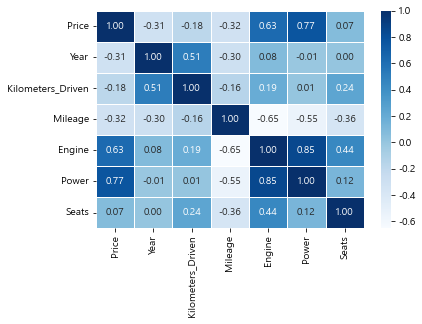

In [156]:
sns.heatmap(data = df.corr(), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')

# 다중선형 회귀분석

In [157]:
df.columns

Index(['Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Brand'],
      dtype='object')

In [158]:
df_pr = df[["Price", "Year" ,"Power", "Kilometers_Driven", "Mileage", "Engine"]]

In [167]:
df_train, df_test = train_test_split(df_pr, test_size=0.4, random_state=1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

reg_model = smf.ols(formula = "Price ~ Year + Power + Kilometers_Driven + Mileage  + \
            Engine", data=df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

train data size: (3514, 6)
test data size: (2343, 6)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     1531.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:05:50   Log-Likelihood:                -37167.
No. Observations:                3514   AIC:                         7.435e+04
Df Residuals:                    3508   BIC:                         7.438e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

- 0.05를 초과하면서 가장 큰 값인 Engine 제거

In [168]:
df_train, df_test = train_test_split(df_pr, test_size=0.4, random_state=1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

reg_model = smf.ols(formula = "Price ~ Year + Power + Kilometers_Driven + Mileage", data=df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

train data size: (3514, 6)
test data size: (2343, 6)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     1912.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:05:56   Log-Likelihood:                -37169.
No. Observations:                3514   AIC:                         7.435e+04
Df Residuals:                    3509   BIC:                         7.438e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

- 0.05를 초과하면서 가장 큰 값은 Mileage이다.
- 스포츠카의 경우, 연비가 낮지만 가격은 높은 경향이 있다고 생각하여 Mileage를 제외한다.

In [169]:
df_train, df_test = train_test_split(df_pr, test_size=0.4, random_state=1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

reg_model = smf.ols(formula = "Price ~ Year + Power + Kilometers_Driven", data=df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

train data size: (3514, 6)
test data size: (2343, 6)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     2550.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:06:08   Log-Likelihood:                -37169.
No. Observations:                3514   AIC:                         7.435e+04
Df Residuals:                    3510   BIC:                         7.437e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [170]:
df_train_x = df_train[['Year', 'Power','Kilometers_Driven']]
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i)\
                for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
2,Power,1.00
3,Kilometers_Driven,1.34
1,Year,1.34
0,const,15.54


- 다중공선성 검사 결과, VIF가 10보다 작으므로 다중공선성이 없다고 판단함

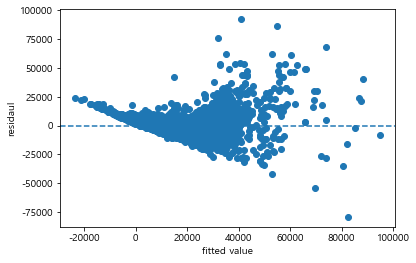

In [171]:
#오차의 기본가정 검토 
#등분산성 검정 
plt.scatter(reg_result.fittedvalues,reg_result.resid)
plt.xlabel("fitted value");
plt.ylabel("residaul")
plt.axhline(y=0, linestyle="--")

- 자료가 많기 때문에 이 정도의 분산은 등분산성을 만족한다고 생각한다.

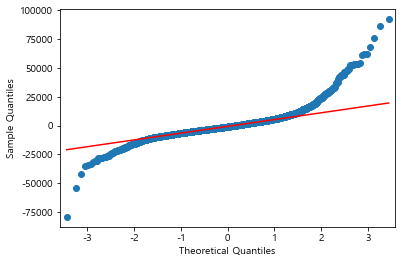

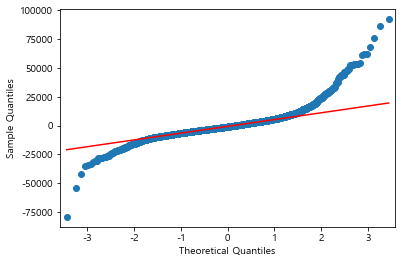

In [172]:
qqplot(reg_result.resid, line="q")

- 정규성 검정 결과, 컬럼 수가 많기 때문에 이 정도의 분포는 정규분포를 따른다고 생각함.

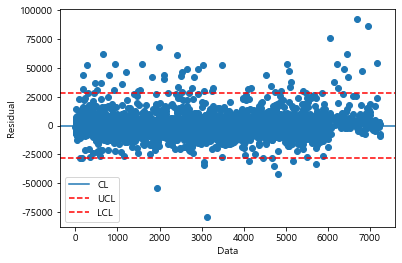

In [173]:
#독립성 검정 
plt.scatter(df_train.index, reg_result.resid, marker="o")
plt.xlabel("Data");
plt.ylabel("Residual")
plt.axhline(y=0, linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--",color="red",label = 'UCL')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="--",color="red",label = 'LCL')
plt.legend();
plt.show()

- 독립성 검정 결과, 잔차가 관리상하한을 많이 벗어나기 때문에, 해당 데이터를 다중선형회귀분석 모델링하기에 적합하지 않다. 

In [174]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['Price'],train_pred))
print("test data의 결정계수:", r2_score(df_test['Price'],test_pred))

train data의 결정계수: 0.68545882506672
test data의 결정계수: 0.6756589311999501


- 독립성을 만족한다는 가정하에, 모델의 성능을 구해보았다.
- train data의 결정계수: 67.4%
- test data의 결정계수: 69.1%

# 의사결정나무

In [577]:
df_dt= pd.DataFrame()

In [578]:
df.columns

Index(['Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Brand'],
      dtype='object')

In [579]:
df_dummy1 = pd.get_dummies(df.Brand)
df_dummy2 = pd.get_dummies(df.Fuel_Type)
df_dummy3 = pd.get_dummies(df.Transmission)
df_dummy4 = pd.get_dummies(df.Owner_Type)

In [580]:
# df_dt = pd.concat([df, df_dummy2, df_dummy3, df_dummy4],axis=1)
df_dt = pd.concat([df, df_dummy1, df_dummy2, df_dummy3, df_dummy4],axis=1)

In [581]:
df_dt

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,CNG,Diesel,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,...,1,0,0,0,0,1,1,0,0,0
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,0,1,0,0,0,1,1,0,0,0
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,...,0,0,0,1,0,1,1,0,0,0
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,...,0,1,0,0,0,1,1,0,0,0
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,...,0,1,0,0,0,1,1,0,0,0
7231,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,...,0,0,0,1,0,1,1,0,0,0
7232,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,...,0,0,0,1,0,1,1,0,0,0
7235,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,...,0,1,0,0,0,1,1,0,0,0


In [362]:
df_dt = df_dt.drop(df_dt[["Location",'Brand','Fuel_Type', 'Transmission','Owner_Type',"Seats","New_Price"]],axis=1)

In [363]:
df_dt.dtypes

Price                float64
Year                   int64
Kilometers_Driven      int64
Mileage              float64
Engine               float64
Power                float64
Audi                   uint8
BMW                    uint8
Chevrolet              uint8
Datsun                 uint8
Fiat                   uint8
Force                  uint8
Ford                   uint8
Honda                  uint8
Hyundai                uint8
ISUZU                  uint8
Jaguar                 uint8
Jeep                   uint8
Land                   uint8
Mahindra               uint8
Maruti                 uint8
Mercedes-Benz          uint8
Mini                   uint8
Mitsubishi             uint8
Nissan                 uint8
Porsche                uint8
Renault                uint8
Skoda                  uint8
Tata                   uint8
Toyota                 uint8
Volkswagen             uint8
Volvo                  uint8
CNG                    uint8
Diesel                 uint8
LPG           

In [364]:
# 목표변수, 설명변수 데이터 지정
df_y = df_dt['Price']
df_x = df_dt.drop('Price',axis=1,inplace=False)

# train/test 데이터 분리 6:4 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.4,random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (3514, 41)
train data Y size: (3514,)
test data X size: (2343, 41)
test data Y size: (2343,)


In [365]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

# train 데이터 설명력
print("Score on training set: {:3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))

# test 데이터 설명력
print("Score on test set: {:3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.999945
Score on test set: 0.745374


## min_samples_leaf

In [366]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_leaf
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.745
1,2,0.977,0.800
2,3,0.955,0.800
3,4,0.936,0.815
4,5,0.921,0.813
5,6,0.913,0.817
6,7,0.906,0.810
7,8,0.900,0.815
8,9,0.893,0.817
9,10,0.888,0.815


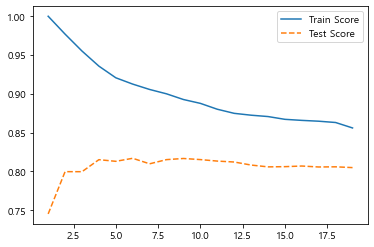

In [367]:
#모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

- 잎사귀 노드의 최소 자료 수 중가에 다라 모델의 설명력은 감소하며,
- test 데이터의 정확도 변화를 고려하여 min_samples_leaf = 4로 선택하였다.

# min_samples_split

In [368]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_split
para_split = [n_split * 2 for n_split in range(2,20)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.936,0.815
1,6,0.936,0.815
2,8,0.936,0.815
3,10,0.929,0.812
4,12,0.925,0.812
5,14,0.916,0.808
6,16,0.914,0.813
7,18,0.909,0.807
8,20,0.904,0.807
9,22,0.901,0.810


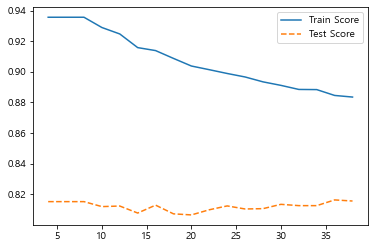

In [369]:
#모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 train/test 데이터의 성능 변화를 고려하여 8 선택

# max_depth

In [370]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_split
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = 8, max_depth = v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.503,0.492
1,2,0.627,0.620
2,3,0.738,0.720
3,4,0.800,0.781
4,5,0.842,0.786
5,6,0.873,0.799
6,7,0.895,0.811
7,8,0.910,0.816
8,9,0.922,0.814
9,10,0.929,0.816


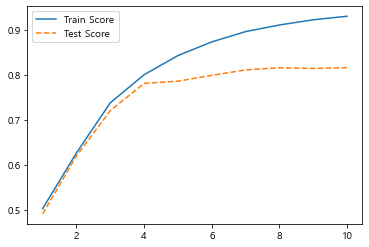

In [371]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()

- 최대 깊이 증가에 따라 모델의 설명력은 증가하며 train/test 데이터의 정확도 변화를 고려하여 6 선택

# 의사결정나무 최종모델 선정

In [372]:
tree_final = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = 8, max_depth = 6)
tree_final.fit(df_train_x,df_train_y)

# train 데이터 설명력
print("Score on training set: {:3f}".format(tree_final.score(df_train_x,df_train_y)))

# test 데이터 설명력
print("Score on test set: {:3f}".format(tree_final.score(df_test_x,df_test_y)))

Score on training set: 0.872649
Score on test set: 0.798608


In [354]:
#변수명 저장
v_feature_name = df_train_x.columns

#최종 모델 시각화
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = 8, max_depth = 6)
tree_graph.fit(df_train_x,df_train_y)

# export_graphviz(tree_graph, out_file = "tree_leaf.dot",
#                feature_names = v_feature_name, impurity=True, filled=True)

# with open("tree_leaf.dot") as f:
#     dot_graph = f.read()
# pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
# pydot_graph.set_size('"10,9!"')
# pydot_graph.write_png('resized_tree.png')
# gvz_graph = graphviz.Source(pydot_graph.to_string())
# gvz_graph

DecisionTreeRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=8,
                      random_state=1234)

In [355]:
# 결론 도출
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['importance'] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,importance
4,Power,0.746
0,Year,0.186
3,Engine,0.029
2,Mileage,0.022
1,Kilometers_Driven,0.006
36,Manual,0.004
20,Mercedes-Benz,0.003
32,Diesel,0.002
12,Honda,0.002
37,First,0.000


Text(0, 0.5, '변수')

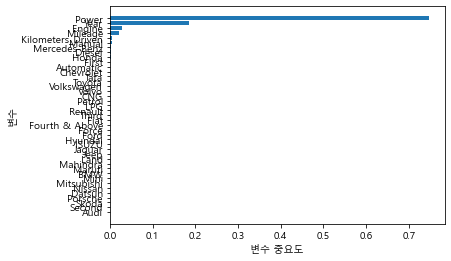

In [356]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance",ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width=df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

**1. 변수중요도는 Power.Year.Porsche.Kilometers_Driven, Mileage 순으로 목표변수인 중고차 가격 Price에 영향이 크다고 해석할 수 있다.**<br><br>
**2. 계산된 변수 중요도값이 낮아도 선택되는 데이터에 따라 다를 수 있다.**<br><br>

**3. train 데이터는 87.3%, test 데이터는 79.9%의 설명력을 갖고 있다.**<br><br>
- Brand, Fuel_Type, Transmission, Owner_Type를 get_dummies해서 분리되었기 때문에 다중공선성 확인 필요

In [373]:
# df_train_x = df_train[['Year', 'Power','Kilometers_Driven']]
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i)\
                for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
0,const,0.00
2,Kilometers_Driven,1.71
1,Year,1.89
3,Mileage,3.85
5,Power,8.71
4,Engine,9.68
25,Porsche,inf
26,Renault,inf
27,Skoda,inf
28,Tata,inf


- 다중공선성 확인 결과 get_dummies 한 변수들이 inf(무한대) 값이 존재하므로, 유의한 인자 중 공통으로 선정된 인자를 토대로 모델링을 재실시해야함

## 의사결정나무 2차 모델링

- 앞선 의사결정나무에서 Brand를 제외하고 모델링

In [374]:
df_dt = pd.DataFrame()

In [375]:
df_dummy1 = pd.get_dummies(df.Brand)
df_dummy2 = pd.get_dummies(df.Fuel_Type)
df_dummy3 = pd.get_dummies(df.Transmission)
# df_dummy4 = pd.get_dummies(df.Owner_Type)

In [376]:
df

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Mumbai,2682.68,13,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,Maruti
1,Pune,19162.00,8,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai
2,Chennai,6898.32,12,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,Honda
3,Chennai,9197.76,11,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti
4,Coimbatore,27194.71,10,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7224,Chennai,8477.27,7,36000,Petrol,Manual,First,19.83,1198.0,67.00,5.0,5.53 Lakh,Datsun
7228,Pune,10822.70,7,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,7.06 Lakh,Tata
7231,Kochi,13474.72,6,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,8.79 Lakh,Ford
7232,Mumbai,27838.55,5,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,18.16 Lakh,Jeep


In [377]:
# df_dt = pd.concat([df, df_dummy1,df_dummy2, df_dummy4],axis=1)
df_dt = pd.concat([df, df_dummy1,df_dummy2, df_dummy3],axis=1)
# df_dt = pd.concat([df, df_dummy1, df_dummy2, df_dummy3, df_dummy4],axis=1)

In [378]:
df_dt

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Tata,Toyota,Volkswagen,Volvo,CNG,Diesel,LPG,Petrol,Automatic,Manual
0,Mumbai,2682.68,13,72000,CNG,Manual,First,26.60,998.0,58.16,...,0,0,0,0,1,0,0,0,0,1
1,Pune,19162.00,8,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,0,0,0,0,0,1,0,0,0,1
2,Chennai,6898.32,12,46000,Petrol,Manual,First,18.20,1199.0,88.70,...,0,0,0,0,0,0,0,1,0,1
3,Chennai,9197.76,11,87000,Diesel,Manual,First,20.77,1248.0,88.76,...,0,0,0,0,0,1,0,0,0,1
4,Coimbatore,27194.71,10,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7224,Chennai,8477.27,7,36000,Petrol,Manual,First,19.83,1198.0,67.00,...,0,0,0,0,0,0,0,1,0,1
7228,Pune,10822.70,7,41413,Diesel,Manual,First,27.28,1047.0,69.00,...,1,0,0,0,0,1,0,0,0,1
7231,Kochi,13474.72,6,39015,Petrol,Manual,First,17.00,1497.0,121.36,...,0,0,0,0,0,0,0,1,0,1
7232,Mumbai,27838.55,5,6000,Petrol,Manual,First,16.00,1368.0,160.00,...,0,0,0,0,0,0,0,1,0,1


In [379]:
df_dt = df_dt.drop(df_dt[["Location",'Brand','Fuel_Type', 'Transmission','Owner_Type',"Seats","New_Price","Mileage"]],axis=1)

In [380]:
df_dt.dtypes

Price                float64
Year                   int64
Kilometers_Driven      int64
Engine               float64
Power                float64
Audi                   uint8
BMW                    uint8
Chevrolet              uint8
Datsun                 uint8
Fiat                   uint8
Force                  uint8
Ford                   uint8
Honda                  uint8
Hyundai                uint8
ISUZU                  uint8
Jaguar                 uint8
Jeep                   uint8
Land                   uint8
Mahindra               uint8
Maruti                 uint8
Mercedes-Benz          uint8
Mini                   uint8
Mitsubishi             uint8
Nissan                 uint8
Porsche                uint8
Renault                uint8
Skoda                  uint8
Tata                   uint8
Toyota                 uint8
Volkswagen             uint8
Volvo                  uint8
CNG                    uint8
Diesel                 uint8
LPG                    uint8
Petrol        

In [381]:
# 목표변수, 설명변수 데이터 지정
df_y = df_dt['Price']
df_x = df_dt.drop('Price',axis=1,inplace=False)

# train/test 데이터 분리 6:4 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.4,random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))



train data X size: (3514, 36)
train data Y size: (3514,)
test data X size: (2343, 36)
test data Y size: (2343,)


In [382]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

# train 데이터 설명력
print("Score on training set: {:3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))

# test 데이터 설명력
print("Score on test set: {:3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.999670
Score on test set: 0.787457


## min_samples_leaf

In [383]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_leaf
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.787
1,2,0.961,0.790
2,3,0.943,0.806
3,4,0.920,0.812
4,5,0.912,0.815
5,6,0.904,0.822
6,7,0.898,0.822
7,8,0.890,0.818
8,9,0.886,0.819
9,10,0.881,0.822


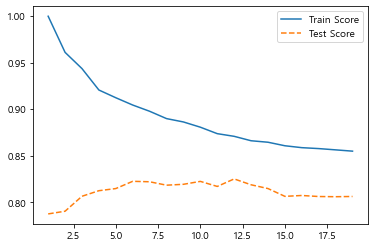

In [384]:
#모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

- 잎사귀 노드의 최소 자료 수 중가에 다라 모델의 설명력은 감소하며,
- test 데이터의 정확도 변화를 고려하여 min_samples_leaf = 4로 선택하였다.

# min_samples_split

In [385]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_split
para_split = [n_split * 2 for n_split in range(2,20)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.920,0.812
1,6,0.920,0.812
2,8,0.920,0.812
3,10,0.916,0.811
4,12,0.913,0.814
5,14,0.908,0.811
6,16,0.905,0.815
7,18,0.903,0.819
8,20,0.897,0.814
9,22,0.897,0.813


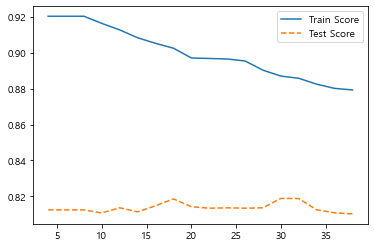

In [386]:
#모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 train/test 데이터의 성능 변화를 고려하여 8 선택

# max_depth

In [387]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_split
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = 8, max_depth = v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.503,0.492
1,2,0.627,0.620
2,3,0.738,0.720
3,4,0.799,0.773
4,5,0.838,0.793
5,6,0.868,0.809
6,7,0.884,0.812
7,8,0.896,0.811
8,9,0.908,0.813
9,10,0.915,0.814


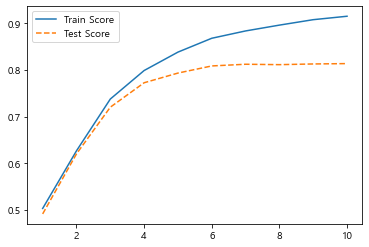

In [388]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()

- 최대 깊이 증가에 따라 모델의 설명력은 증가하며 train/test 데이터의 정확도 변화를 고려하여 6 선택

# 의사결정나무 최종모델 선정

In [389]:
tree_final = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = 8, max_depth = 6)
tree_final.fit(df_train_x,df_train_y)

# train 데이터 설명력
print("Score on training set: {:3f}".format(tree_final.score(df_train_x,df_train_y)))

# test 데이터 설명력
print("Score on test set: {:3f}".format(tree_final.score(df_test_x,df_test_y)))

Score on training set: 0.868011
Score on test set: 0.808698


In [390]:
#변수명 저장
v_feature_name = df_train_x.columns

#최종 모델 시각화
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = 8, max_depth = 6)
tree_graph.fit(df_train_x,df_train_y)

# export_graphviz(tree_graph, out_file = "tree_leaf.dot",
#                feature_names = v_feature_name, impurity=True, filled=True)

# with open("tree_leaf.dot") as f:
#     dot_graph = f.read()
# pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
# pydot_graph.set_size('"10,9!"')
# pydot_graph.write_png('resized_tree.png')
# gvz_graph = graphviz.Source(pydot_graph.to_string())
# gvz_graph

DecisionTreeRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=8,
                      random_state=1234)

In [391]:
# 결론 도출
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['importance'] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,importance
3,Power,0.752
0,Year,0.186
2,Engine,0.027
1,Kilometers_Driven,0.011
15,Jeep,0.009
19,Mercedes-Benz,0.006
34,Automatic,0.004
25,Skoda,0.002
11,Honda,0.002
31,Diesel,0.001


Text(0, 0.5, '변수')

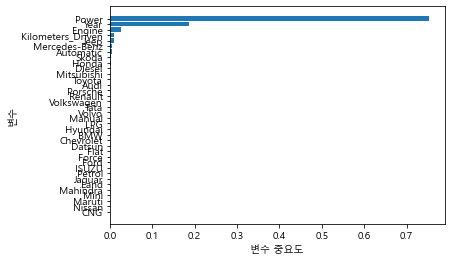

In [392]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance",ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width=df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

**1. 변수중요도는 Power.Year.Porsche.Kilometers_Driven, Mileage 순으로 목표변수인 중고차 가격 Price에 영향이 크다고 해석할 수 있다.**<br><br>
**2. 계산된 변수 중요도값이 낮아도 선택되는 데이터에 따라 다를 수 있다.**<br><br>

**3. train 데이터는 86%, test 데이터는 82%의 설명력을 갖고 있다.**<br><br>
- Fuel_Type, Transmission, Owner_Type를 get_dummies해서 분리되었기 때문에 다중공선성 확인 필요

In [252]:
# df_train_x = df_train[['Year', 'Power','Kilometers_Driven']]
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i)\
                for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
0,const,0.00
2,Kilometers_Driven,1.64
1,Year,1.71
3,Mileage,3.14
5,Power,4.98
4,Engine,7.02
6,CNG,inf
7,Diesel,inf
8,LPG,inf
9,Petrol,inf


- 앞선 1차 모델링 결과보다 다중공선성이 해결된 것을 볼 수 있지만, 여전히 inf 값 존재하므로 재모델링이 필요

## 의사결정나무 2차 모델링

In [270]:
df_dummy1 = pd.get_dummies(df.Brand)
# df_dummy2 = pd.get_dummies(df.Fuel_Type)
df_dummy3 = pd.get_dummies(df.Transmission)
df_dummy4 = pd.get_dummies(df.Owner_Type)

In [271]:
df_dt = pd.concat([df, df_dummy1,df_dummy3, df_dummy4],axis=1)

# df_dt = pd.concat([df, df_dummy2, df_dummy3, df_dummy4],axis=1)
# df_dt = pd.concat([df, df_dummy1, df_dummy2, df_dummy3, df_dummy4],axis=1)

In [272]:
df_dt

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Automatic,Manual,First,Fourth & Above,Second,Third
0,Mumbai,2682.68,13,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,Maruti,0,1,1,0,0,0
1,Pune,19162.00,8,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai,0,1,1,0,0,0
2,Chennai,6898.32,12,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,Honda,0,1,1,0,0,0
3,Chennai,9197.76,11,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti,0,1,1,0,0,0
4,Coimbatore,27194.71,10,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Audi,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,10822.70,7,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,7.06 Lakh,Tata,0,1,1,0,0,0
7231,Kochi,13474.72,6,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,8.79 Lakh,Ford,0,1,1,0,0,0
7232,Mumbai,27838.55,5,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,18.16 Lakh,Jeep,0,1,1,0,0,0
7235,Kochi,16203.39,6,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,10.57 Lakh,Maruti,0,1,1,0,0,0


In [273]:
df_dt = df_dt.drop(df_dt[["Location",'Brand','Fuel_Type', 'Transmission','Owner_Type',"Seats","New_Price"]],axis=1)

In [274]:
df_dt.dtypes

Price                float64
Year                   int64
Kilometers_Driven      int64
Mileage              float64
Engine               float64
Power                float64
Automatic              uint8
Manual                 uint8
First                  uint8
Fourth & Above         uint8
Second                 uint8
Third                  uint8
dtype: object

In [275]:
# 목표변수, 설명변수 데이터 지정
df_y = df_dt['Price']
df_x = df_dt.drop('Price',axis=1,inplace=False)

# train/test 데이터 분리 6:4 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.4,random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))



train data X size: (3514, 11)
train data Y size: (3514,)
test data X size: (2344, 11)
test data Y size: (2344,)


In [276]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

# train 데이터 설명력
print("Score on training set: {:3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))

# test 데이터 설명력
print("Score on test set: {:3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.999371
Score on test set: 0.748663


## min_samples_leaf

In [277]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_leaf
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.999,0.749
1,2,0.960,0.796
2,3,0.936,0.820
3,4,0.920,0.840
4,5,0.906,0.838
5,6,0.895,0.836
6,7,0.885,0.837
7,8,0.876,0.840
8,9,0.874,0.838
9,10,0.867,0.833


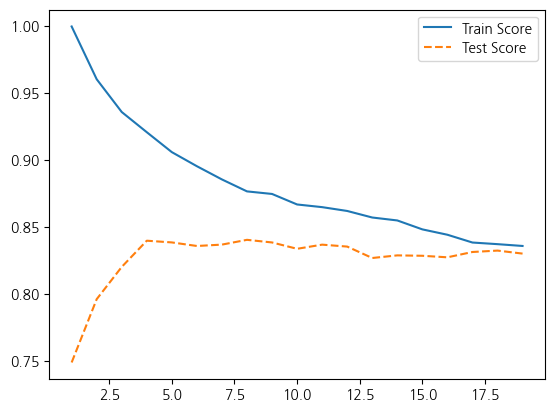

In [278]:
#모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

- 잎사귀 노드의 최소 자료 수 중가에 다라 모델의 설명력은 감소하며,
- test 데이터의 정확도 변화를 고려하여 min_samples_leaf = 4로 선택하였다.

# min_samples_split

In [279]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_split
para_split = [n_split * 2 for n_split in range(2,20)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.920,0.840
1,6,0.920,0.840
2,8,0.920,0.840
3,10,0.917,0.840
4,12,0.915,0.842
5,14,0.909,0.841
6,16,0.905,0.841
7,18,0.900,0.845
8,20,0.899,0.844
9,22,0.895,0.843


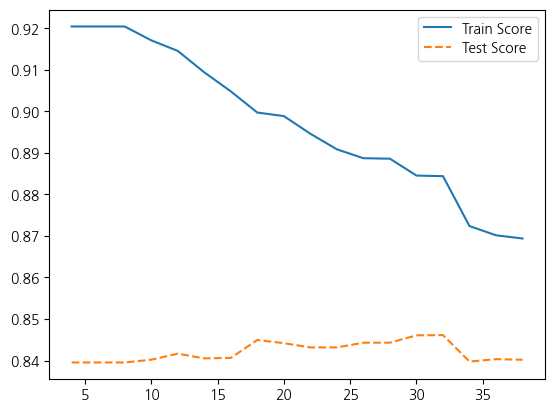

In [280]:
#모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 train/test 데이터의 성능 변화를 고려하여 8 선택

# max_depth

In [281]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_split
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = 8, max_depth = v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.507,0.487
1,2,0.629,0.618
2,3,0.725,0.750
3,4,0.785,0.802
4,5,0.828,0.819
5,6,0.860,0.829
6,7,0.884,0.839
7,8,0.896,0.843
8,9,0.909,0.844
9,10,0.916,0.840


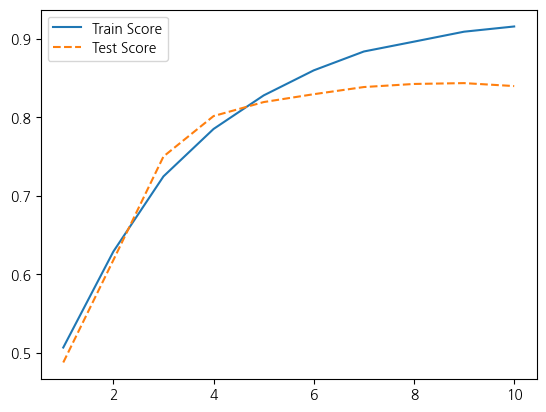

In [282]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()

- 최대 깊이 증가에 따라 모델의 설명력은 증가하며 train/test 데이터의 정확도 변화를 고려하여 6 선택

# 의사결정나무 최종모델 선정

In [283]:
tree_final = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = 8, max_depth = 6)
tree_final.fit(df_train_x,df_train_y)

# train 데이터 설명력
print("Score on training set: {:3f}".format(tree_final.score(df_train_x,df_train_y)))

# test 데이터 설명력
print("Score on test set: {:3f}".format(tree_final.score(df_test_x,df_test_y)))

Score on training set: 0.859869
Score on test set: 0.829463


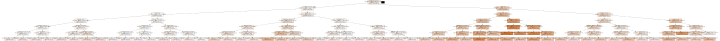

In [284]:
#변수명 저장
v_feature_name = df_train_x.columns

#최종 모델 시각화
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = 8, max_depth = 6)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity=True, filled=True)

with open("tree_leaf.dot") as f:
    dot_graph = f.read()
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.set_size('"10,9!"')
pydot_graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [285]:
# 결론 도출
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['importance'] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,importance
4,Power,0.752
0,Year,0.189
2,Mileage,0.020
1,Kilometers_Driven,0.020
3,Engine,0.015
5,Automatic,0.004
6,Manual,0.001
7,First,0.000
8,Fourth & Above,0.000
9,Second,0.000


Text(0, 0.5, '변수')

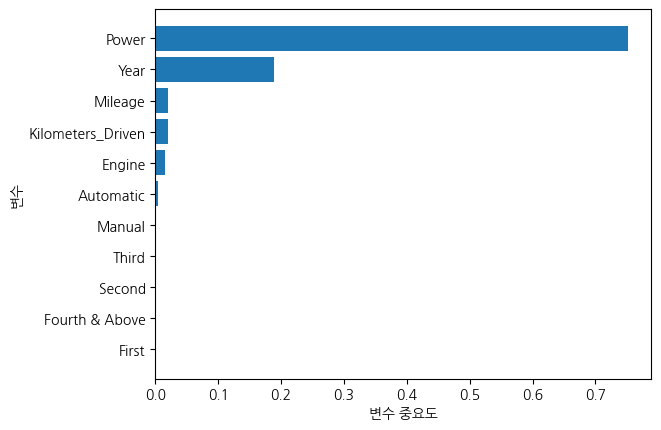

In [286]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance",ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width=df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

**1. 변수중요도는 Power.Year.Porsche.Kilometers_Driven, Mileage 순으로 목표변수인 중고차 가격 Price에 영향이 크다고 해석할 수 있다.**<br><br>
**2. 계산된 변수 중요도값이 낮아도 선택되는 데이터에 따라 다를 수 있다.**<br><br>

**3. train 데이터는 86%, test 데이터는 83%의 설명력을 갖고 있다.**<br><br>
- Transmission, Owner_Type를 get_dummies해서 분리되었기 때문에 다중공선성 확인 필요

In [287]:
# df_train_x = df_train[['Year', 'Power','Kilometers_Driven']]
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i)\
                for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
0,const,0.00
2,Kilometers_Driven,1.53
1,Year,1.69
3,Mileage,2.04
4,Engine,4.84
5,Power,4.89
6,Automatic,inf
7,Manual,inf
8,First,inf
9,Fourth & Above,inf


- 다중공선성 확인 결과, 2차모델링보다 낮은 값이 나왔지만, 여전히 get_dummies 한 값이 inf로 확인됨

- 1차 모델링과 비교했을 때, 적은 수치이지만  test score에 대해 더 높은 결과값을 가졌다.
- 1차 모델링보다 더 좋은 모델링을 수행했다고 할 수 있다.

## 랜덤포레스트

In [582]:
df_rf = pd.DataFrame()

In [583]:
df_dummy1 = pd.get_dummies(df.Brand)
df_dummy2 = pd.get_dummies(df.Fuel_Type)
df_dummy3 = pd.get_dummies(df.Transmission)
df_dummy4 = pd.get_dummies(df.Owner_Type)

In [584]:
# df_dt = pd.concat([df, df_dummy2, df_dummy3, df_dummy4],axis=1)
df_rf = pd.concat([df, df_dummy1, df_dummy2, df_dummy3, df_dummy4],axis=1)

In [585]:
df_rf

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,CNG,Diesel,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,...,1,0,0,0,0,1,1,0,0,0
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,0,1,0,0,0,1,1,0,0,0
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,...,0,0,0,1,0,1,1,0,0,0
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,...,0,1,0,0,0,1,1,0,0,0
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,...,0,1,0,0,0,1,1,0,0,0
7231,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,...,0,0,0,1,0,1,1,0,0,0
7232,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,...,0,0,0,1,0,1,1,0,0,0
7235,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,...,0,1,0,0,0,1,1,0,0,0


In [586]:
df_rf = df_rf.drop(df_rf[["Location",'Brand','Fuel_Type', 'Transmission','Owner_Type',"Seats","New_Price"]],axis=1)

In [402]:
df_rf.dtypes

Price                float64
Year                   int64
Kilometers_Driven      int64
Mileage              float64
Engine               float64
Power                float64
Audi                   uint8
BMW                    uint8
Chevrolet              uint8
Datsun                 uint8
Fiat                   uint8
Force                  uint8
Ford                   uint8
Honda                  uint8
Hyundai                uint8
ISUZU                  uint8
Jaguar                 uint8
Jeep                   uint8
Land                   uint8
Mahindra               uint8
Maruti                 uint8
Mercedes-Benz          uint8
Mini                   uint8
Mitsubishi             uint8
Nissan                 uint8
Porsche                uint8
Renault                uint8
Skoda                  uint8
Tata                   uint8
Toyota                 uint8
Volkswagen             uint8
Volvo                  uint8
CNG                    uint8
Diesel                 uint8
LPG           

In [403]:
# 목표변수, 설명변수 데이터 지정
df_y = df_rf['Price']
df_x = df_rf.drop('Price',axis=1,inplace=False)

# train/test 데이터 분리 6:4 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.4,random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (3514, 41)
train data Y size: (3514,)
test data X size: (2343, 41)
test data Y size: (2343,)


In [404]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

# train 데이터 설명력
print("Score on training set: {:3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))

# test 데이터 설명력
print("Score on test set: {:3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.980330
Score on test set: 0.850948


In [405]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

# n_estimators: 트리 수 변경:10~100
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators= v_n_estimators, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.974,0.839
1,20,0.977,0.851
2,30,0.978,0.849
3,40,0.977,0.848
4,50,0.978,0.846
5,60,0.979,0.846
6,70,0.980,0.847
7,80,0.980,0.850
8,90,0.980,0.851
9,100,0.980,0.851


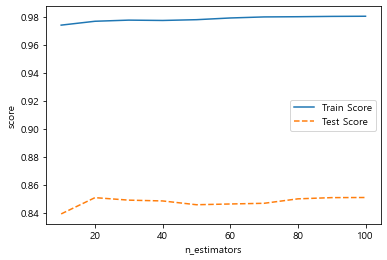

In [406]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

- 생성하는 결정트리 수 증가에 따라 모델의 설명력은 증가하며
- 트리 수 가 30개를 초과해도 설명력은 거의 향상되지 않음
- 최대 트리 수에 따른 영향을 ㅐ제하고 다른 파라미터의 영향을 확인하고자 80선택

# min_samples_leaf

In [407]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_leaf
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators= 80, random_state=1234 , min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [410]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.980,0.850
1,2,0.959,0.854
2,3,0.942,0.852
3,4,0.929,0.850
4,5,0.918,0.847
5,6,0.911,0.846
6,7,0.903,0.843
7,8,0.897,0.841
8,9,0.892,0.839
9,10,0.886,0.835


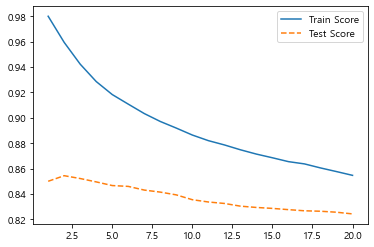

In [411]:
#모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

- 잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며
- test 데이터의 정확도 변화를 고려하여 1 선택

# min_samples_split

In [412]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_split
para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators= 80, random_state=1234 , min_samples_leaf=1,
                              min_samples_split= v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
#모델 설명력 그래프 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.971,0.852
1,6,0.962,0.853
2,8,0.954,0.853
3,10,0.947,0.852
4,12,0.942,0.852
5,14,0.936,0.851
6,16,0.932,0.850
7,18,0.928,0.849
8,20,0.925,0.849
9,22,0.921,0.848


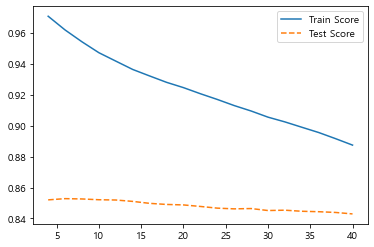

In [413]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며
- train/test 데이터의 성능 변화를 고려하여 4 선택

# max_depth

In [414]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_split
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators= 80, random_state=1234 , min_samples_leaf=1,min_samples_split= 4,max_depth = v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.503,0.492
1,2,0.655,0.648
2,3,0.772,0.756
3,4,0.832,0.796
4,5,0.875,0.820
5,6,0.905,0.833
6,7,0.925,0.842
7,8,0.941,0.846
8,9,0.952,0.849
9,10,0.959,0.850


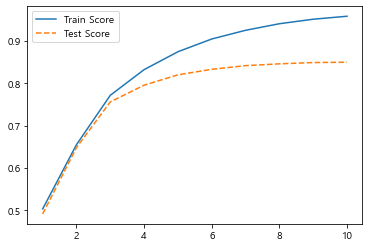

In [415]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()

- 최대 깊이 증가에 따라 모델의 설명력은 증가하며
- train/test 데이터의 정확도 변화를 고려하여 10선택

## 랜덤포레스트 최종 모델 선정

In [416]:
df_train_x.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Audi',
       'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'ISUZU', 'Jaguar', 'Jeep', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo', 'CNG', 'Diesel',
       'LPG', 'Petrol', 'Automatic', 'Manual', 'First', 'Fourth & Above',
       'Second', 'Third'],
      dtype='object')

In [417]:
df_train_x.shape

(3514, 41)

In [418]:
df_train_y.shape

(3514,)

In [419]:
rf_final = RandomForestRegressor(n_estimators= 80, random_state=1234 , min_samples_leaf=1,min_samples_split= 4,max_depth = 10)
rf_final.fit(df_train_x,df_train_y)

# train 데이터 설명력
print("Score on training set: {:3f}".format(rf_final.score(df_train_x,df_train_y)))

# test 데이터 설명력
print("Score on test set: {:3f}".format(rf_final.score(df_test_x,df_test_y)))

Score on training set: 0.958607
Score on test set: 0.850022


In [421]:
#변수명 저장
v_feature_name = df_train_x.columns

#트리 0선택
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot",
               feature_names = v_feature_name, impurity=True, filled=True)

#tree_final_0.dot 그리기
# with open("rfr_final_0.dot") as f:
#     dot_graph = f.read()
# pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
# pydot_graph.set_size('"10,9!"')
# pydot_graph.write_png('resized_tree.png')
# gvz_graph = graphviz.Source(pydot_graph.to_string())
# gvz_graph

In [422]:
#변수명 저장
v_feature_name = df_train_x.columns

#트리 1 선택
export_graphviz(rf_final.estimators_[1], out_file = "rfr_final_1.dot",
               feature_names = v_feature_name, impurity=True, filled=True)

#tree_final_1.dot 그리기
# with open("rfr_final_1.dot") as f:
#     dot_graph = f.read()
# pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
# pydot_graph.set_size('"10,9!"')
# pydot_graph.write_png('resized_tree.png')
# gvz_graph = graphviz.Source(pydot_graph.to_string())
# gvz_graph

In [423]:
# 결론 도출
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['importance'] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,importance
4,Power,0.678
0,Year,0.177
1,Kilometers_Driven,0.038
3,Engine,0.030
2,Mileage,0.029
17,Land,0.012
20,Mercedes-Benz,0.008
24,Porsche,0.005
5,Audi,0.003
35,Automatic,0.003


Text(0, 0.5, '변수')

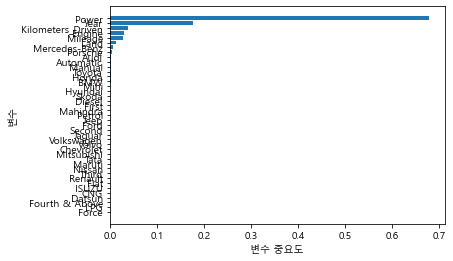

In [427]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance",ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width=df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [428]:
# df_train_x = df_train[['Year', 'Power','Kilometers_Driven']]
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i)\
                for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
0,const,0.00
2,Kilometers_Driven,1.71
1,Year,1.89
3,Mileage,3.85
5,Power,8.71
4,Engine,9.68
25,Porsche,inf
26,Renault,inf
27,Skoda,inf
28,Tata,inf


- 랜덤 포레스트의 다중공선성 확인 결과, 10 미만으로 다중공선성은 해결되었다고 판단했지만, get_dummies 한 값들이 inf로 나타나 2차 모델링이 필요하다고 판단하였다.
- train: 95.9%, test: 85.0%

## 랜덤 포레스트 2차 모델링

In [429]:
df_dummy1 = pd.get_dummies(df.Brand)
df_dummy2 = pd.get_dummies(df.Fuel_Type)
df_dummy3 = pd.get_dummies(df.Transmission)
# df_dummy4 = pd.get_dummies(df.Owner_Type)

In [430]:
df_rf = pd.concat([df, df_dummy1,df_dummy2, df_dummy3],axis=1)
# df_rf = pd.concat([df, df_dummy1, df_dummy2, df_dummy3, df_dummy4],axis=1)

In [431]:
df_rf

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Tata,Toyota,Volkswagen,Volvo,CNG,Diesel,LPG,Petrol,Automatic,Manual
0,Mumbai,2682.68,13,72000,CNG,Manual,First,26.60,998.0,58.16,...,0,0,0,0,1,0,0,0,0,1
1,Pune,19162.00,8,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,0,0,0,0,0,1,0,0,0,1
2,Chennai,6898.32,12,46000,Petrol,Manual,First,18.20,1199.0,88.70,...,0,0,0,0,0,0,0,1,0,1
3,Chennai,9197.76,11,87000,Diesel,Manual,First,20.77,1248.0,88.76,...,0,0,0,0,0,1,0,0,0,1
4,Coimbatore,27194.71,10,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7224,Chennai,8477.27,7,36000,Petrol,Manual,First,19.83,1198.0,67.00,...,0,0,0,0,0,0,0,1,0,1
7228,Pune,10822.70,7,41413,Diesel,Manual,First,27.28,1047.0,69.00,...,1,0,0,0,0,1,0,0,0,1
7231,Kochi,13474.72,6,39015,Petrol,Manual,First,17.00,1497.0,121.36,...,0,0,0,0,0,0,0,1,0,1
7232,Mumbai,27838.55,5,6000,Petrol,Manual,First,16.00,1368.0,160.00,...,0,0,0,0,0,0,0,1,0,1


In [432]:
df_rf = df_rf.drop(df_rf[["Location",'Brand','Fuel_Type', 'Transmission','Owner_Type',"Seats","New_Price"]],axis=1)

In [434]:
df_rf.dtypes

Price                float64
Year                   int64
Kilometers_Driven      int64
Mileage              float64
Engine               float64
Power                float64
Audi                   uint8
BMW                    uint8
Chevrolet              uint8
Datsun                 uint8
Fiat                   uint8
Force                  uint8
Ford                   uint8
Honda                  uint8
Hyundai                uint8
ISUZU                  uint8
Jaguar                 uint8
Jeep                   uint8
Land                   uint8
Mahindra               uint8
Maruti                 uint8
Mercedes-Benz          uint8
Mini                   uint8
Mitsubishi             uint8
Nissan                 uint8
Porsche                uint8
Renault                uint8
Skoda                  uint8
Tata                   uint8
Toyota                 uint8
Volkswagen             uint8
Volvo                  uint8
CNG                    uint8
Diesel                 uint8
LPG           

In [435]:
# 목표변수, 설명변수 데이터 지정
df_y = df_rf['Price']
df_x = df_rf.drop('Price',axis=1,inplace=False)

# train/test 데이터 분리 6:4 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.4,random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (3514, 37)
train data Y size: (3514,)
test data X size: (2343, 37)
test data Y size: (2343,)


In [452]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

# train 데이터 설명력
print("Score on training set: {:3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))

# test 데이터 설명력
print("Score on test set: {:3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.980533
Score on test set: 0.851219


In [453]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

# n_estimators: 트리 수 변경:10~100
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators= v_n_estimators, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.974,0.840
1,20,0.976,0.851
2,30,0.977,0.848
3,40,0.978,0.848
4,50,0.978,0.846
5,60,0.979,0.846
6,70,0.980,0.846
7,80,0.980,0.849
8,90,0.980,0.850
9,100,0.981,0.851


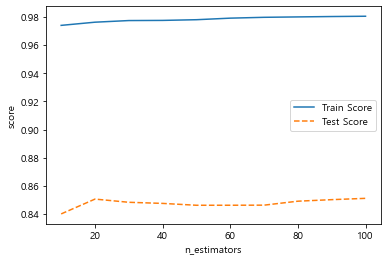

In [454]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

- 생성하는 결정트리 수 증가에 따라 모델의 설명력은 증가하며
- 트리 수 가 30개를 초과해도 설명력은 거의 향상되지 않음
- 최대 트리 수에 따른 영향을 ㅐ제하고 다른 파라미터의 영향을 확인하고자 80선택

# min_samples_leaf

In [455]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_leaf
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators= 80, random_state=1234 , min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [456]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.980,0.849
1,2,0.959,0.855
2,3,0.942,0.853
3,4,0.928,0.850
4,5,0.918,0.847
5,6,0.911,0.846
6,7,0.903,0.843
7,8,0.897,0.841
8,9,0.892,0.839
9,10,0.886,0.835


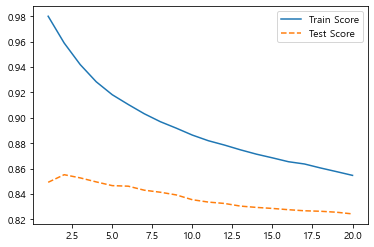

In [458]:
#모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

- 잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며
- test 데이터의 정확도 변화를 고려하여 1 선택

# min_samples_split

In [459]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_split
para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators= 80, random_state=1234 , min_samples_leaf=1,
                              min_samples_split= v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
#모델 설명력 그래프 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.971,0.852
1,6,0.962,0.854
2,8,0.954,0.854
3,10,0.947,0.853
4,12,0.942,0.853
5,14,0.936,0.851
6,16,0.932,0.849
7,18,0.928,0.850
8,20,0.925,0.849
9,22,0.921,0.849


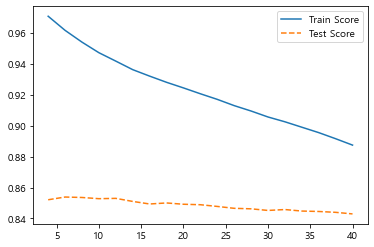

In [460]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며
- train/test 데이터의 성능 변화를 고려하여 4 선택

# max_depth

In [461]:
#train 및 test 설명력 결과 저장
train_score = []
test_score= []

#min_samples_split
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators= 80, random_state=1234 , min_samples_leaf=1,min_samples_split= 4,max_depth = v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.503,0.492
1,2,0.655,0.648
2,3,0.772,0.756
3,4,0.833,0.796
4,5,0.875,0.820
5,6,0.905,0.834
6,7,0.925,0.842
7,8,0.941,0.848
8,9,0.951,0.849
9,10,0.959,0.851


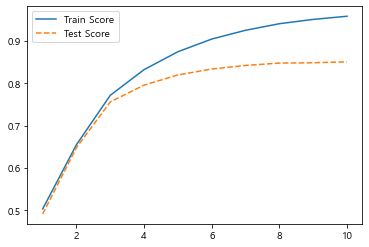

In [462]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()

- 최대 깊이 증가에 따라 모델의 설명력은 증가하며
- train/test 데이터의 정확도 변화를 고려하여 10선택

## 랜덤포레스트 최종 모델 선정

In [463]:
df_train_x.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Audi',
       'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'ISUZU', 'Jaguar', 'Jeep', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo', 'CNG', 'Diesel',
       'LPG', 'Petrol', 'Automatic', 'Manual'],
      dtype='object')

In [464]:
df_train_x.shape

(3514, 37)

In [465]:
df_train_y.shape

(3514,)

In [466]:
rf_final = RandomForestRegressor(n_estimators= 80, random_state=1234 , min_samples_leaf=1,min_samples_split= 4,max_depth = 10)
rf_final.fit(df_train_x,df_train_y)

# train 데이터 설명력
print("Score on training set: {:3f}".format(rf_final.score(df_train_x,df_train_y)))

# test 데이터 설명력
print("Score on test set: {:3f}".format(rf_final.score(df_test_x,df_test_y)))

Score on training set: 0.958587
Score on test set: 0.850931


In [467]:
#변수명 저장
v_feature_name = df_train_x.columns

#트리 0선택
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot",
               feature_names = v_feature_name, impurity=True, filled=True)

#tree_final_0.dot 그리기
# with open("rfr_final_0.dot") as f:
#     dot_graph = f.read()
# pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
# pydot_graph.set_size('"10,9!"')
# pydot_graph.write_png('resized_tree.png')
# gvz_graph = graphviz.Source(pydot_graph.to_string())
# gvz_graph

In [468]:
#변수명 저장
v_feature_name = df_train_x.columns

#트리 1 선택
export_graphviz(rf_final.estimators_[1], out_file = "rfr_final_1.dot",
               feature_names = v_feature_name, impurity=True, filled=True)

#tree_final_1.dot 그리기
# with open("rfr_final_1.dot") as f:
#     dot_graph = f.read()
# pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
# pydot_graph.set_size('"10,9!"')
# pydot_graph.write_png('resized_tree.png')
# gvz_graph = graphviz.Source(pydot_graph.to_string())
# gvz_graph

In [469]:
# 결론 도출
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['importance'] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,importance
4,Power,0.678
0,Year,0.178
1,Kilometers_Driven,0.038
3,Engine,0.029
2,Mileage,0.028
17,Land,0.012
20,Mercedes-Benz,0.008
24,Porsche,0.005
5,Audi,0.003
35,Automatic,0.003


Text(0, 0.5, '변수')

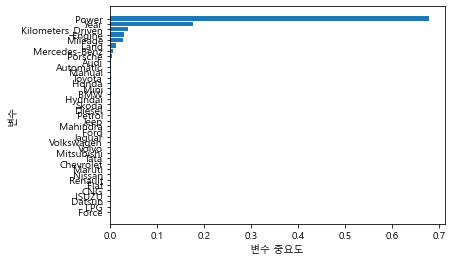

In [470]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance",ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width=df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- 변수 중요도가 Power가 68.0%로 한 변수에 많이 치중되어 있기 때문에 좋은 모델이라 하기 어렵다.
- 1차 모델링보다 높은 중요도가 나왔다.

In [471]:
# df_train_x = df_train[['Year', 'Power','Kilometers_Driven']]
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i)\
                for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
0,const,0.00
2,Kilometers_Driven,1.70
1,Year,1.72
3,Mileage,3.84
5,Power,8.71
4,Engine,9.68
23,Mitsubishi,inf
24,Nissan,inf
25,Porsche,inf
26,Renault,inf


- 1차 모델링 결과보다 낮은 다중 공선성을 갖고 있지만, 여전히 get_dummies한 범주형 변수들은 inf 값을 갖고 있다.
- train: 95.5%, test: 87.9%
- 1차 모델링 결과보다 test score에 있어서 더 높은 결과가 나와, 더 설명력이 있는 모델이 만들어졌다.

## 그래디언트 부스팅

In [517]:
df_dummy1 = pd.get_dummies(df.Brand)
df_dummy2 = pd.get_dummies(df.Fuel_Type)
df_dummy3 = pd.get_dummies(df.Transmission)
df_dummy4 = pd.get_dummies(df.Owner_Type)

In [518]:
# df_dt = pd.concat([df, df_dummy2, df_dummy3, df_dummy4],axis=1)
df_gb = pd.concat([df, df_dummy1, df_dummy2, df_dummy3, df_dummy4],axis=1)

In [519]:
df_gb

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,CNG,Diesel,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,...,1,0,0,0,0,1,1,0,0,0
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,0,1,0,0,0,1,1,0,0,0
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,...,0,0,0,1,0,1,1,0,0,0
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,...,0,1,0,0,0,1,1,0,0,0
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,...,0,1,0,0,0,1,1,0,0,0
7231,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,...,0,0,0,1,0,1,1,0,0,0
7232,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,...,0,0,0,1,0,1,1,0,0,0
7235,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,...,0,1,0,0,0,1,1,0,0,0


In [520]:
df_gb = df_gb.drop(df_gb[["Location",'Brand','Fuel_Type', 'Transmission','Owner_Type',"Seats","New_Price"]],axis=1)

In [521]:
df_gb.dtypes

Price                float64
Year                   int64
Kilometers_Driven      int64
Mileage              float64
Engine               float64
Power                float64
Ambassador             uint8
Audi                   uint8
BMW                    uint8
Bentley                uint8
Chevrolet              uint8
Datsun                 uint8
Fiat                   uint8
Force                  uint8
Ford                   uint8
Honda                  uint8
Hyundai                uint8
ISUZU                  uint8
Jaguar                 uint8
Jeep                   uint8
Lamborghini            uint8
Land                   uint8
Mahindra               uint8
Maruti                 uint8
Mercedes-Benz          uint8
Mini                   uint8
Mitsubishi             uint8
Nissan                 uint8
Porsche                uint8
Renault                uint8
Skoda                  uint8
Smart                  uint8
Tata                   uint8
Toyota                 uint8
Volkswagen    

In [522]:
# 목표변수, 설명변수 데이터 지정
df_y = df_gb['Price']
df_x = df_gb.drop('Price',axis=1,inplace=False)

# train/test 데이터 분리 6:4 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.4,random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (3718, 45)
train data Y size: (3718,)
test data X size: (2480, 45)
test data Y size: (2480,)


In [523]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.925
Score on test set: 0.820


### n_estimators

In [524]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,21)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["Estimator"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,Estimator,TrainScore,TestScore
0,10,0.698,0.617
1,20,0.828,0.742
2,30,0.871,0.782
3,40,0.889,0.801
4,50,0.899,0.808
5,60,0.908,0.813
6,70,0.913,0.815
7,80,0.918,0.816
8,90,0.921,0.817
9,100,0.925,0.820


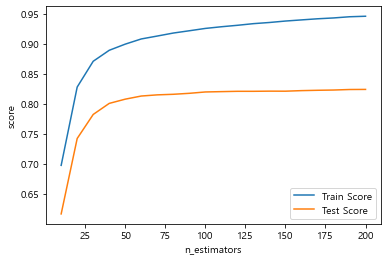

In [525]:
plt.plot(para_n_tree, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle ="-", label = "Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

- 트리 수 증가에 따라 모델의 설명력이 향상되고 있으나 test 데이터의 성능 변화를 고려하여 140 선택

### min_samples_leaf

In [526]:
train_score = []
test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 140,min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.935,0.821
1,2,0.934,0.815
2,3,0.933,0.815
3,4,0.933,0.830
4,5,0.932,0.828
5,6,0.931,0.830
6,7,0.929,0.826
7,8,0.929,0.829
8,9,0.926,0.831
9,10,0.924,0.827


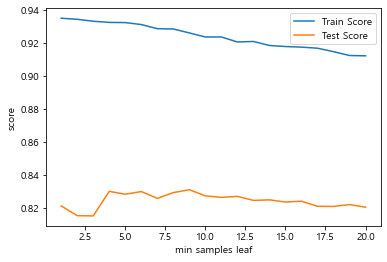

In [527]:
plt.plot(para_leaf, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle ="-", label = "Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

- 잎사귀 노드의 최소 자료 수 증가에 다라 모델의 설명력은 감소하며, test와 train 데이터의 성능 변화를 고려하여 3 선택

In [528]:
#min_samples_split

train_score = []
test_score=[]

para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 140,min_samples_leaf=3,
                              min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.933,0.815
1,6,0.933,0.815
2,8,0.932,0.819
3,10,0.932,0.818
4,12,0.933,0.824
5,14,0.932,0.823
6,16,0.932,0.823
7,18,0.930,0.822
8,20,0.930,0.818
9,22,0.929,0.821


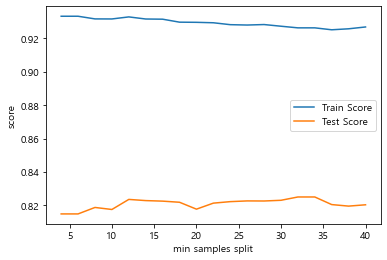

In [529]:
plt.plot(para_split, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_split, test_score, linestyle ="-", label = "Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며, train과 test 데이터의 성능 변화를 고려하여 6 선택

In [530]:
#max_depth
train_score = []
test_score=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 140,min_samples_leaf=3,
                              min_samples_split=6, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.787,0.716
1,2,0.897,0.806
2,3,0.933,0.815
3,4,0.960,0.830
4,5,0.971,0.832
5,6,0.981,0.835
6,7,0.988,0.832
7,8,0.992,0.829
8,9,0.995,0.825
9,10,0.996,0.822


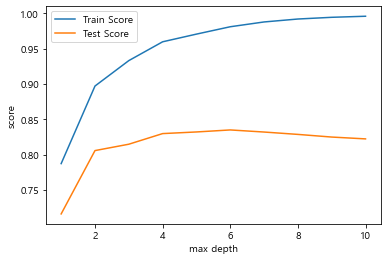

In [531]:
plt.plot(para_depth, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle ="-", label = "Test Score")
plt.ylabel("score")
plt.xlabel("max depth")
plt.legend()

- 최대 깊이 증가에 따라 모델의 설명력은 증가하며, test 데이터의 성능 변화를 고려하여 4 선택

In [532]:
#learning rate
train_score = []
test_score=[]

para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learing_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 140,min_samples_leaf=3,
                              min_samples_split=6, max_depth=4, learning_rate=v_learing_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_lr = pd.DataFrame()
df_score_lr["LearingRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,LearingRate,TrainScore,TestScore
0,0.1,0.960,0.830
1,0.2,0.973,0.832
2,0.3,0.980,0.831
3,0.4,0.985,0.822
4,0.5,0.988,0.827
5,0.6,0.990,0.816
6,0.7,0.991,0.811
7,0.8,0.992,0.794
8,0.9,0.992,0.777


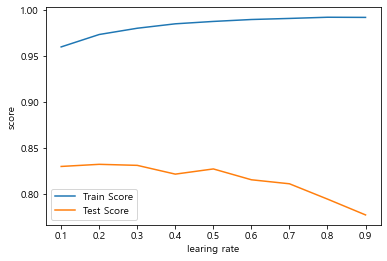

In [533]:
plt.plot(para_lr, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle ="-", label = "Test Score")
plt.ylabel("score")
plt.xlabel("learing rate")
plt.legend()

- 학습률 증가에 따라 모델의 설명력은 증가하는데, test 데이터의 성능은 급격하게 저하되어 0.1 선택

## 그래디언트 부스트 최종모델 선정

In [534]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 140,min_samples_leaf=3,
                              min_samples_split=6, max_depth=4, learning_rate=0.1)
gb_final.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.960
Score on test set: 0.830


In [535]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
4,Power,0.673
0,Year,0.177
3,Engine,0.030
1,Kilometers_Driven,0.028
2,Mileage,0.024
20,Land,0.012
23,Mercedes-Benz,0.009
39,Automatic,0.008
40,Manual,0.007
24,Mini,0.005


Text(0, 0.5, '변수')

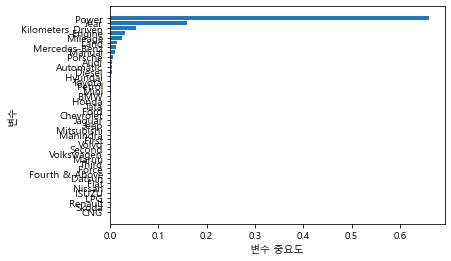

In [493]:
df_importance.sort_values("Importance",ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- 변수 중요도가 Power가 66.2%로 중요도의 3/5 이상을 차지하고 있음.

In [494]:
# df_train_x = df_train[['Year', 'Power','Kilometers_Driven']]
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i)\
                for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
0,const,0.00
2,Kilometers_Driven,1.71
1,Year,1.89
3,Mileage,3.85
5,Power,8.71
4,Engine,9.68
25,Porsche,inf
26,Renault,inf
27,Skoda,inf
28,Tata,inf


- 다중공선성 확인 결과, get_dummies한 범주형 변수들은 inf 값을 갖고 있어 2차 모델링이 필요하다고 판단함.
- train: 94.8%, test: 87.1% 


## 그래디언트 부스팅 2차 모델링

- Brand를 제외하고 2차 모델링 진행

In [536]:
df_dummy1 = pd.get_dummies(df.Brand)
df_dummy2 = pd.get_dummies(df.Fuel_Type)
df_dummy3 = pd.get_dummies(df.Transmission)
# df_dummy4 = pd.get_dummies(df.Owner_Type)

In [537]:
# df_dt = pd.concat([df, df_dummy2, df_dummy3, df_dummy4],axis=1)
df_gb = pd.concat([df, df_dummy1, df_dummy2, df_dummy3],axis=1)
# df_gb = pd.concat([df, df_dummy2, df_dummy3, df_dummy4],axis=1)

In [538]:
df_gb

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Tata,Toyota,Volkswagen,Volvo,CNG,Diesel,LPG,Petrol,Automatic,Manual
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,...,0,0,0,0,1,0,0,0,0,1
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,0,0,0,0,0,1,0,0,0,1
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,...,0,0,0,0,0,0,0,1,0,1
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,...,0,0,0,0,0,1,0,0,0,1
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,...,1,0,0,0,0,1,0,0,0,1
7231,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,...,0,0,0,0,0,0,0,1,0,1
7232,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,...,0,0,0,0,0,0,0,1,0,1
7235,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,...,0,0,0,0,0,1,0,0,0,1


In [539]:
df_gb = df_gb.drop(df_gb[["Location",'Brand','Fuel_Type', 'Transmission','Owner_Type',"Seats","New_Price"]],axis=1)

In [540]:
df_gb.dtypes

Price                float64
Year                   int64
Kilometers_Driven      int64
Mileage              float64
Engine               float64
Power                float64
Ambassador             uint8
Audi                   uint8
BMW                    uint8
Bentley                uint8
Chevrolet              uint8
Datsun                 uint8
Fiat                   uint8
Force                  uint8
Ford                   uint8
Honda                  uint8
Hyundai                uint8
ISUZU                  uint8
Jaguar                 uint8
Jeep                   uint8
Lamborghini            uint8
Land                   uint8
Mahindra               uint8
Maruti                 uint8
Mercedes-Benz          uint8
Mini                   uint8
Mitsubishi             uint8
Nissan                 uint8
Porsche                uint8
Renault                uint8
Skoda                  uint8
Smart                  uint8
Tata                   uint8
Toyota                 uint8
Volkswagen    

In [541]:
# 목표변수, 설명변수 데이터 지정
df_y = df_gb['Price']
df_x = df_gb.drop('Price',axis=1,inplace=False)

# train/test 데이터 분리 6:4 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.4,random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (3718, 41)
train data Y size: (3718,)
test data X size: (2480, 41)
test data Y size: (2480,)


In [542]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.925
Score on test set: 0.818


### n_estimators

In [543]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,21)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["Estimator"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,Estimator,TrainScore,TestScore
0,10,0.698,0.617
1,20,0.828,0.742
2,30,0.871,0.782
3,40,0.889,0.800
4,50,0.899,0.806
5,60,0.908,0.812
6,70,0.913,0.814
7,80,0.916,0.815
8,90,0.921,0.816
9,100,0.925,0.818


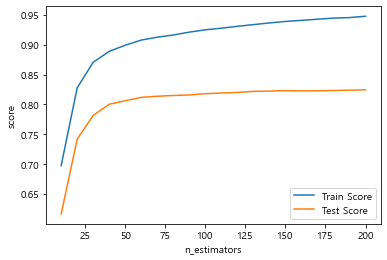

In [544]:
plt.plot(para_n_tree, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle ="-", label = "Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

- 트리 수 증가에 따라 모델의 설명력이 향상되고 있으나 test 데이터의 성능 변화를 고려하여 190 선택

### min_samples_leaf

In [545]:
train_score = []
test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 190,min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.945,0.824
1,2,0.944,0.819
2,3,0.942,0.820
3,4,0.943,0.835
4,5,0.942,0.830
5,6,0.940,0.834
6,7,0.939,0.830
7,8,0.936,0.829
8,9,0.936,0.835
9,10,0.934,0.833


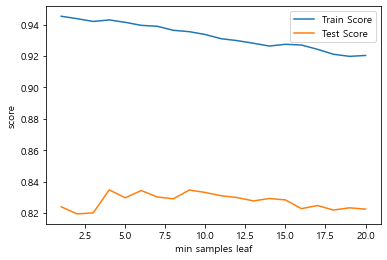

In [546]:
plt.plot(para_leaf, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle ="-", label = "Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

- 잎사귀 노드의 최소 자료 수 증가에 다라 모델의 설명력은 감소하며, test와 train 데이터의 성능 변화를 고려하여 5 선택

In [547]:
#min_samples_split

train_score = []
test_score=[]

para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 190,min_samples_leaf=5,
                              min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.942,0.830
1,6,0.942,0.830
2,8,0.942,0.830
3,10,0.942,0.830
4,12,0.943,0.831
5,14,0.940,0.830
6,16,0.939,0.833
7,18,0.939,0.831
8,20,0.940,0.831
9,22,0.939,0.832


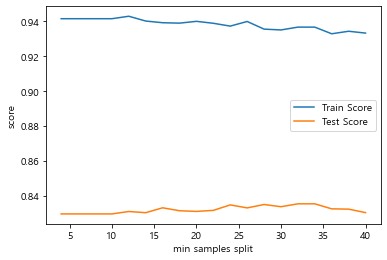

In [548]:
plt.plot(para_split, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_split, test_score, linestyle ="-", label = "Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며, train과 test 데이터의 성능 변화를 고려하여 10 선택

In [549]:
#max_depth
train_score = []
test_score=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 190,min_samples_leaf=5,
                              min_samples_split=10, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.796,0.724
1,2,0.904,0.813
2,3,0.942,0.830
3,4,0.961,0.834
4,5,0.973,0.831
5,6,0.980,0.830
6,7,0.985,0.835
7,8,0.986,0.827
8,9,0.990,0.829
9,10,0.991,0.827


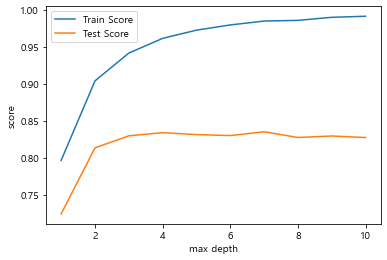

In [550]:
plt.plot(para_depth, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle ="-", label = "Test Score")
plt.ylabel("score")
plt.xlabel("max depth")
plt.legend()

- 최대 깊이 증가에 따라 모델의 설명력은 증가하며, test 데이터의 성능 변화를 고려하여 5 선택

In [551]:
#learning rate
train_score = []
test_score=[]

para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learing_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 190,min_samples_leaf=5,
                              min_samples_split=10, max_depth=5, learning_rate=v_learing_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_lr = pd.DataFrame()
df_score_lr["LearingRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,LearingRate,TrainScore,TestScore
0,0.1,0.973,0.831
1,0.2,0.984,0.835
2,0.3,0.990,0.832
3,0.4,0.993,0.821
4,0.5,0.995,0.808
5,0.6,0.996,0.800
6,0.7,0.996,0.782
7,0.8,0.997,0.786
8,0.9,0.997,0.804


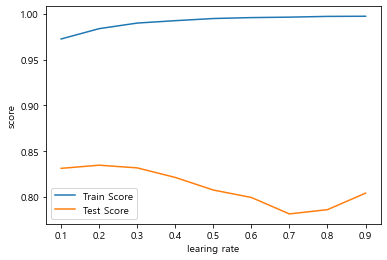

In [552]:
plt.plot(para_lr, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle ="-", label = "Test Score")
plt.ylabel("score")
plt.xlabel("learing rate")
plt.legend()

- 학습률 증가에 따라 모델의 설명력은 증가하는데, test 데이터의 성능은 급격하게 저하되어 0.1 선택

## 그래디언트 부스트 최종모델 선정

In [553]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 190,min_samples_leaf=5,
                              min_samples_split=10, max_depth=5, learning_rate=0.1)
gb_final.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.973
Score on test set: 0.831


In [554]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
4,Power,0.666
0,Year,0.174
3,Engine,0.035
2,Mileage,0.032
1,Kilometers_Driven,0.031
20,Land,0.012
23,Mercedes-Benz,0.008
39,Automatic,0.005
24,Mini,0.005
40,Manual,0.005


Text(0, 0.5, '변수')

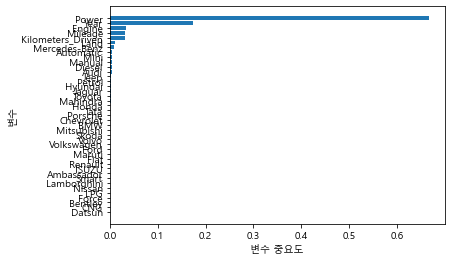

In [555]:
df_importance.sort_values("Importance",ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- 변수 중요도가 Power가 67.7%로 중요도의 3/5 이상을 차지하고 있음.

In [556]:
# df_train_x = df_train[['Year', 'Power','Kilometers_Driven']]
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i)\
                for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
0,const,0.00
2,Kilometers_Driven,1.04
1,Year,1.37
3,Mileage,2.86
5,Power,6.91
4,Engine,8.83
26,Mitsubishi,inf
27,Nissan,inf
28,Porsche,inf
29,Renault,inf


- 다중공선성 확인 결과, get_dummies한 범주형 변수들은 inf 값을 갖고 있어 2차 모델링이 필요하다고 판단함.
- train: 96.0%, test: 89.2% 

- 1차 모델링 결과보다 train 데이터의 설명력은 향상되었지만, test 데이터의 설명력은 감소하여, 다른 변수로 재모델링이 필요하다고 판단함.


## 모델평가 및 선정

In [564]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [565]:
# 회귀분석, 의사결정나무, 랜덤포레스트, 그래디언트 부스팅에서 모델 선정하기

### 회귀분석의 최종 모델

In [621]:
df_pr = df[["Price", "Year" ,"Power", "Kilometers_Driven", "Mileage", "Engine"]]

In [622]:
#회귀분석
df_train, df_test = train_test_split(df_pr, test_size=0.4, random_state=1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

lr_model = smf.ols(formula = "Price ~ Year + Power + Kilometers_Driven", data=df_train)

lr_result = lr_model.fit()
print(lr_result.summary())

train data size: (3718, 6)
test data size: (2480, 6)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2090.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:57:25   Log-Likelihood:                -39613.
No. Observations:                3718   AIC:                         7.923e+04
Df Residuals:                    3714   BIC:                         7.926e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [623]:
df_pr

,Price,Year,Power,Kilometers_Driven,Mileage,Engine
0,2682.68,2010,58.16,72000,26.60,998.0
1,19162.00,2015,126.20,41000,19.67,1582.0
2,6898.32,2011,88.70,46000,18.20,1199.0
3,9197.76,2012,88.76,87000,20.77,1248.0
4,27194.71,2013,140.80,40670,15.20,1968.0
...,...,...,...,...,...,...
7228,10822.70,2016,69.00,41413,27.28,1047.0
7231,13474.72,2017,121.36,39015,17.00,1497.0
7232,27838.55,2018,160.00,6000,16.00,1368.0
7235,16203.39,2017,88.50,21380,24.30,1248.0


## 의사결정나무 최종모델

In [628]:
df_dummy1 = pd.get_dummies(df.Brand)
df_dummy2 = pd.get_dummies(df.Fuel_Type)
df_dummy3 = pd.get_dummies(df.Transmission)
# df_dummy4 = pd.get_dummies(df.Owner_Type)

df_dt = pd.concat([df, df_dummy1, df_dummy2, df_dummy3],axis=1)
# df_dt = pd.concat([df, df_dummy1, df_dummy2, df_dummy3, df_dummy4],axis=1)


df_dt = df_dt.drop(df_dt[["Location",'Brand','Fuel_Type', 'Transmission','Owner_Type',"Seats","New_Price"]],axis=1)


# 목표변수, 설명변수 데이터 지정
df_y = df_dt['Price']
df_x = df_dt.drop('Price',axis=1,inplace=False)

# train/test 데이터 분리 6:4 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.4,random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))


tree_final = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = 8, max_depth = 6)
tree_final.fit(df_train_x,df_train_y)

# train 데이터 설명력
print("Score on training set: {:3f}".format(tree_final.score(df_train_x,df_train_y)))

# test 데이터 설명력
print("Score on test set: {:3f}".format(tree_final.score(df_test_x,df_test_y)))

train data X size: (3718, 41)
train data Y size: (3718,)
test data X size: (2480, 41)
test data Y size: (2480,)
Score on training set: 0.874873
Score on test set: 0.766547


In [629]:
#의사결정나무
dt_model = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4, min_samples_split = 8, max_depth = 6)
dt_model.fit(df_train_x,df_train_y)


DecisionTreeRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=8,
                      random_state=1234)

### 랜덤 포레스트 최종모델

In [634]:
df_dummy1 = pd.get_dummies(df.Brand)
df_dummy2 = pd.get_dummies(df.Fuel_Type)
df_dummy3 = pd.get_dummies(df.Transmission)
# df_dummy4 = pd.get_dummies(df.Owner_Type)

# df_rf = pd.concat([df, df_dummy3, df_dummy4],axis=1)
df_rf = pd.concat([df, df_dummy1, df_dummy2, df_dummy3],axis=1)


df_rf = df_rf.drop(df_rf[["Location",'Brand','Fuel_Type', 'Transmission','Owner_Type',"Seats","New_Price"]],axis=1)


# 목표변수, 설명변수 데이터 지정
df_y = df_rf['Price']
df_x = df_rf.drop('Price',axis=1,inplace=False)

# train/test 데이터 분리 6:4 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.4,random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))
rf_final = RandomForestRegressor(n_estimators= 80, random_state=1234 , min_samples_leaf=1,min_samples_split= 4,max_depth = 10)
rf_final.fit(df_train_x,df_train_y)

# train 데이터 설명력
print("Score on training set: {:3f}".format(rf_final.score(df_train_x,df_train_y)))

# test 데이터 설명력
print("Score on test set: {:3f}".format(rf_final.score(df_test_x,df_test_y)))

train data X size: (3718, 41)
train data Y size: (3718,)
test data X size: (2480, 41)
test data Y size: (2480,)
Score on training set: 0.960771
Score on test set: 0.819538


In [635]:
rf_model = RandomForestRegressor(n_estimators= 80, random_state=1234 , min_samples_leaf=1,min_samples_split= 4,max_depth = 10)
rf_model.fit(df_train_x,df_train_y)

RandomForestRegressor(max_depth=10, min_samples_split=4, n_estimators=80,
                      random_state=1234)

### 그래디언트 부스팅 최종모델

In [636]:
df_dummy1 = pd.get_dummies(df.Brand)
df_dummy2 = pd.get_dummies(df.Fuel_Type)
df_dummy3 = pd.get_dummies(df.Transmission)
# df_dummy4 = pd.get_dummies(df.Owner_Type)

# df_rf = pd.concat([df, df_dummy3, df_dummy4],axis=1)
df_gb = pd.concat([df, df_dummy1, df_dummy2, df_dummy3],axis=1)


df_gb = df_gb.drop(df_gb[["Location",'Brand','Fuel_Type', 'Transmission','Owner_Type',"Seats","New_Price"]],axis=1)


# 목표변수, 설명변수 데이터 지정
df_y = df_gb['Price']
df_x = df_gb.drop('Price',axis=1,inplace=False)

# train/test 데이터 분리 6:4 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.4,random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 140,min_samples_leaf=3,
                              min_samples_split=6, max_depth=4, learning_rate=0.1)
gb_final.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

train data X size: (3718, 41)
train data Y size: (3718,)
test data X size: (2480, 41)
test data Y size: (2480,)
Score on training set: 0.958
Score on test set: 0.829


In [637]:
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators = 140,min_samples_leaf=3,
                              min_samples_split=6, max_depth=4, learning_rate=0.1)
gb_model.fit(df_train_x,df_train_y)


GradientBoostingRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=6,
                          n_estimators=140, random_state=1234)

In [638]:
# models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
models = ["의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]

# mse, rmse, mae, mape = [],[],[],[]
mse, rmse, mae, mape = [],[],[],[]

In [639]:
# #회귀분석 예측 및 평가 
# lr_y_pred = lr_result.predict(df_test_x)

# mse.append(mean_squared_error(df_test['Price'],lr_y_pred))
# rmse.append(root_mean_squared_error(df_test['Price'],lr_y_pred))
# mae.append(mean_absolute_error(df_test['Price'],lr_y_pred))
# mape.append(mean_absolute_percentage_error(df_test['Price'],lr_y_pred))

In [640]:
#의사결정나무 예측 및 평가 
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [641]:
#랜덤 포레스트 예측 및 평가 
rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [642]:
#그래디언트 부스팅 예측 및 평가 
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

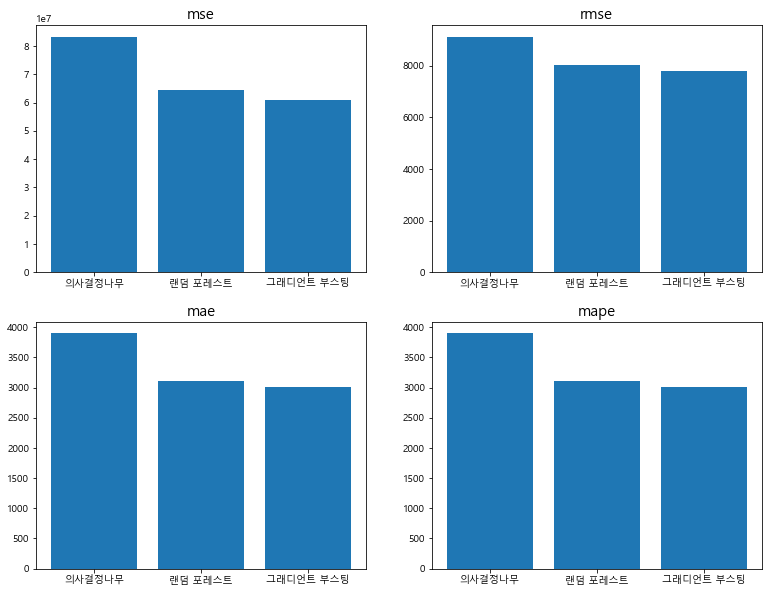

In [643]:
#시각화
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mae)
ax[1,1].set_title("mape").set_fontsize(15)

- 그래디언트 부스팅 > 랜덤 포레스트 > 의사결정나무 > 회귀분석 순으로 좋은 모델을 보였다.
- 하지만 최종 모델을 선정할 때 그래디언트 부스팅은 모든 설명변수를 포함하였고, 랜덤 포레스트, 의사결정나무, 회귀분석 순으로 설명변수 수가 적어져 당연한 결과라고 생각하였다.


## 핵심인자 선정 및 결과 해석

In [428]:
'Year', 'Power','Kilometers_Driven'

('Year', 'Power', 'Kilometers_Driven')

회귀분석, 의사결정나무, 랜덤 포레스트, 그래디언트 부스팅 모델링 결과
목표변수인 Price에 많은 영향을 미치는 인자는 Year, Power, Kilometer_Driven이다.<br>
또한 범주형 설명변수 중에서도, Brand, Transmission이 영향을 많이 미쳤다.

영향을 많이 미치는 인자를 정리해보면<br>
Power > Year > Brand > Killometer_Driven 순으로 정리할 수 있다.